In [1]:
import numpy as np
import pandas as pd

In [2]:
## Função para preparação do holdout (separando classes e dados) ##
def separation_features(dataframe):
    df_features = dataframe.iloc[:, :-1]
    df_classe = dataframe['classe']
    return df_features, df_classe;

## Lendo as bases: 
df1 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_max.csv')
df2 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_avg.csv')
df3 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_max.csv')
df4 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_max.csv')
df5 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_avg.csv')
df6 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_avg.csv')

df7 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_max.csv')
df8 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_avg.csv')
df9 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_max.csv')
df10 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_max.csv')
df11 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_avg.csv')
df12 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_avg.csv')


X1, y1 = separation_features(df1)
X2, y2 = separation_features(df2)
X3, y3 = separation_features(df3)
X4, y4 = separation_features(df4)
X5, y5 = separation_features(df5)
X6, y6 = separation_features(df6)
X7, y7 = separation_features(df7)
X8, y8 = separation_features(df8)
X9, y9 = separation_features(df9)
X10, y10 = separation_features(df10)
X11, y11 = separation_features(df11)
X12, y12 = separation_features(df12)

In [3]:
## Carregando o Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,shuffle=True, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,shuffle=True, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,shuffle=True, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,shuffle=True, random_state=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,shuffle=True, random_state=1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3,shuffle=True, random_state=1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3,shuffle=True, random_state=1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3,shuffle=True, random_state=1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3,shuffle=True, random_state=1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3,shuffle=True, random_state=1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3,shuffle=True, random_state=1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.3,shuffle=True, random_state=1)


In [17]:
rf10 = RandomForestClassifier(n_estimators=10,criterion="log_loss")
rf20 = RandomForestClassifier(n_estimators=20,criterion="log_loss")
rf30 = RandomForestClassifier(n_estimators=30,criterion="log_loss")
rf100 = RandomForestClassifier(n_estimators=100,criterion="log_loss")

rfs = [rf10, rf20, rf30, rf100]

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
def aplicar_RF_holdout(X_train, X_test, y_train, y_test, rf):
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        acuracia = metrics.accuracy_score(y_test, y_pred)
        print(f'Metrica: {rf}  | Accuracy: %.5f' % acuracia)

        print(confusion_matrix(y_test, y_pred))

def aplicar_RF_kfold(X, y, rf, k_fold=10):
    kf = KFold(n_splits=k_fold, random_state=1, shuffle=True)

    scores = cross_val_score(rf, X, y, scoring='accuracy', cv=kf)
    print(f'\nMétrica: {rf.estimator.__class__.__name__}')
    print(f'Accuracy média: %.5f ± %.5f' % (scores.mean(), scores.std()))

    y_pred = cross_val_predict(rf, X, y, cv=kf)
    print(confusion_matrix(y, y_pred))

In [27]:
datasets = [
    ('cnn_VGG16_256_max', X1_train, X1_test, y1_train, y1_test),
    ('cnn_VGG16_256_avg', X2_train, X2_test, y2_train, y2_test),
    ('cnn_VGG19_128_max', X3_train, X3_test, y3_train, y3_test),
    ('cnn_VGG19_256_max', X4_train, X4_test, y4_train, y4_test),
    ('cnn_VGG19_128_avg', X5_train, X5_test, y5_train, y5_test),
    ('cnn_VGG19_256_avg', X6_train, X6_test, y6_train, y6_test),
    ('PCA_cnn_VGG16_256_max', X7_train, X7_test, y7_train, y7_test),
    ('PCA_cnn_VGG16_256_avg', X8_train, X8_test, y8_train, y8_test),
    ('PCA_cnn_VGG19_128_max', X9_train, X9_test, y9_train, y9_test),
    ('PCA_cnn_VGG19_256_max', X10_train, X10_test, y10_train, y10_test),
    ('PCA_cnn_VGG19_128_avg', X11_train, X11_test, y11_train, y11_test),
    ('PCA_cnn_VGG19_256_avg', X12_train, X12_test, y12_train, y12_test),
]


--------------------- cnn_VGG16_256_max ---------------------


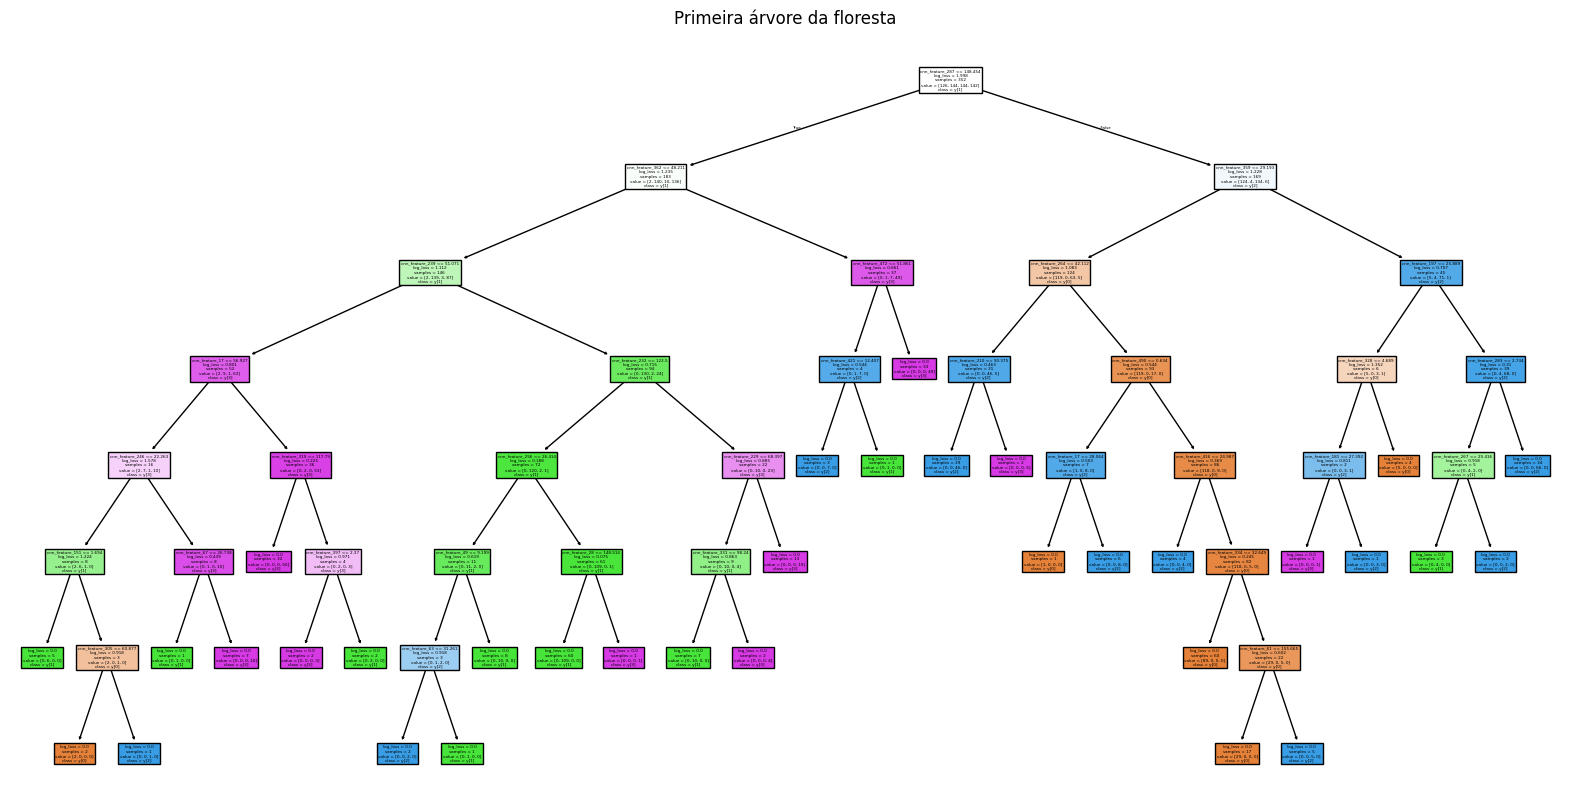

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.94142
[[64  0  0  0]
 [ 0 50  4  3]
 [ 1  3 61  0]
 [ 1  2  0 50]]


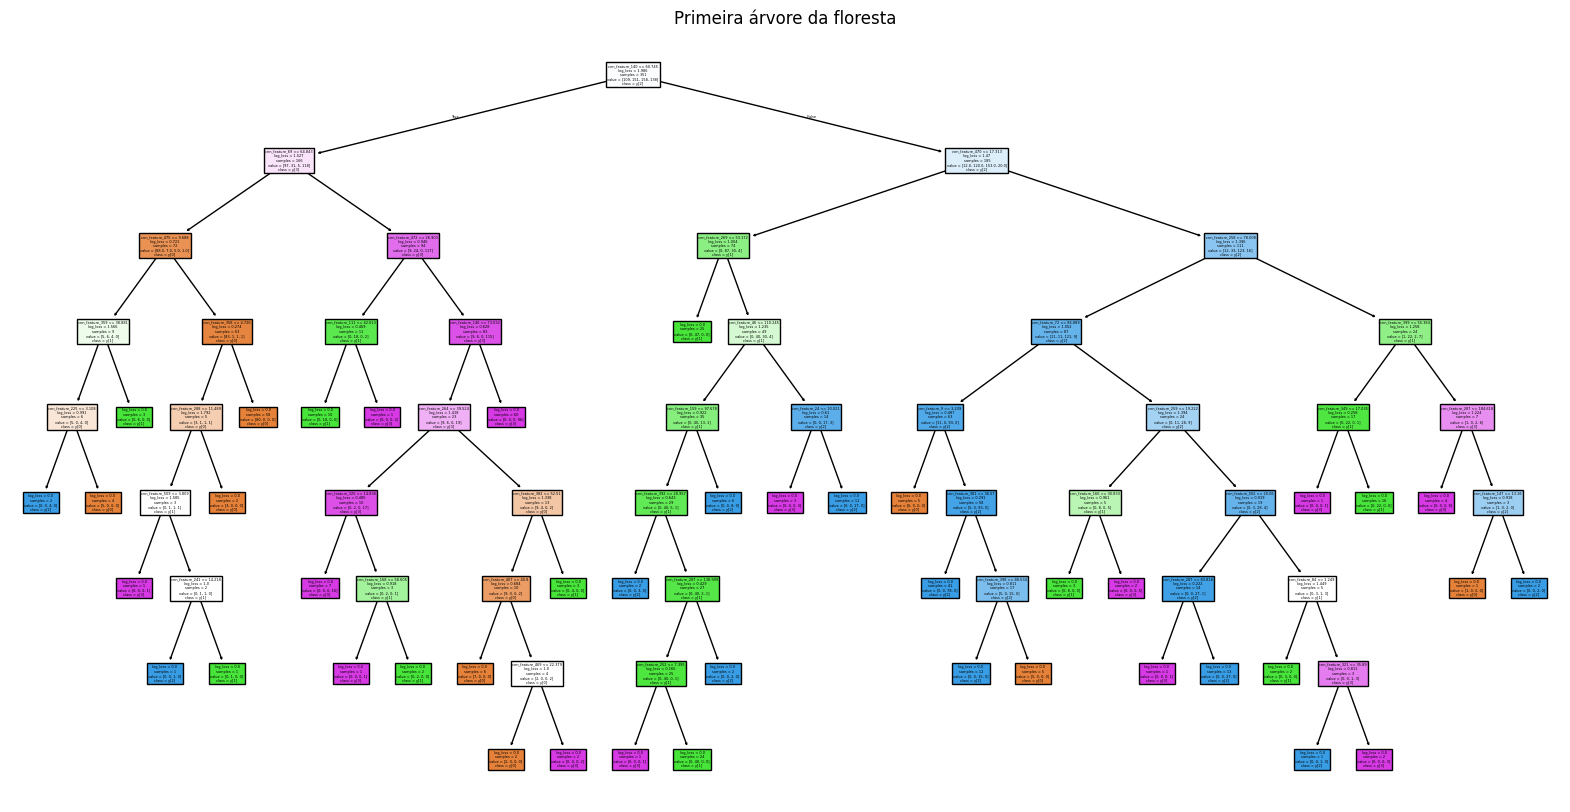

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 56  1  0]
 [ 0  0 65  0]
 [ 0  3  0 50]]


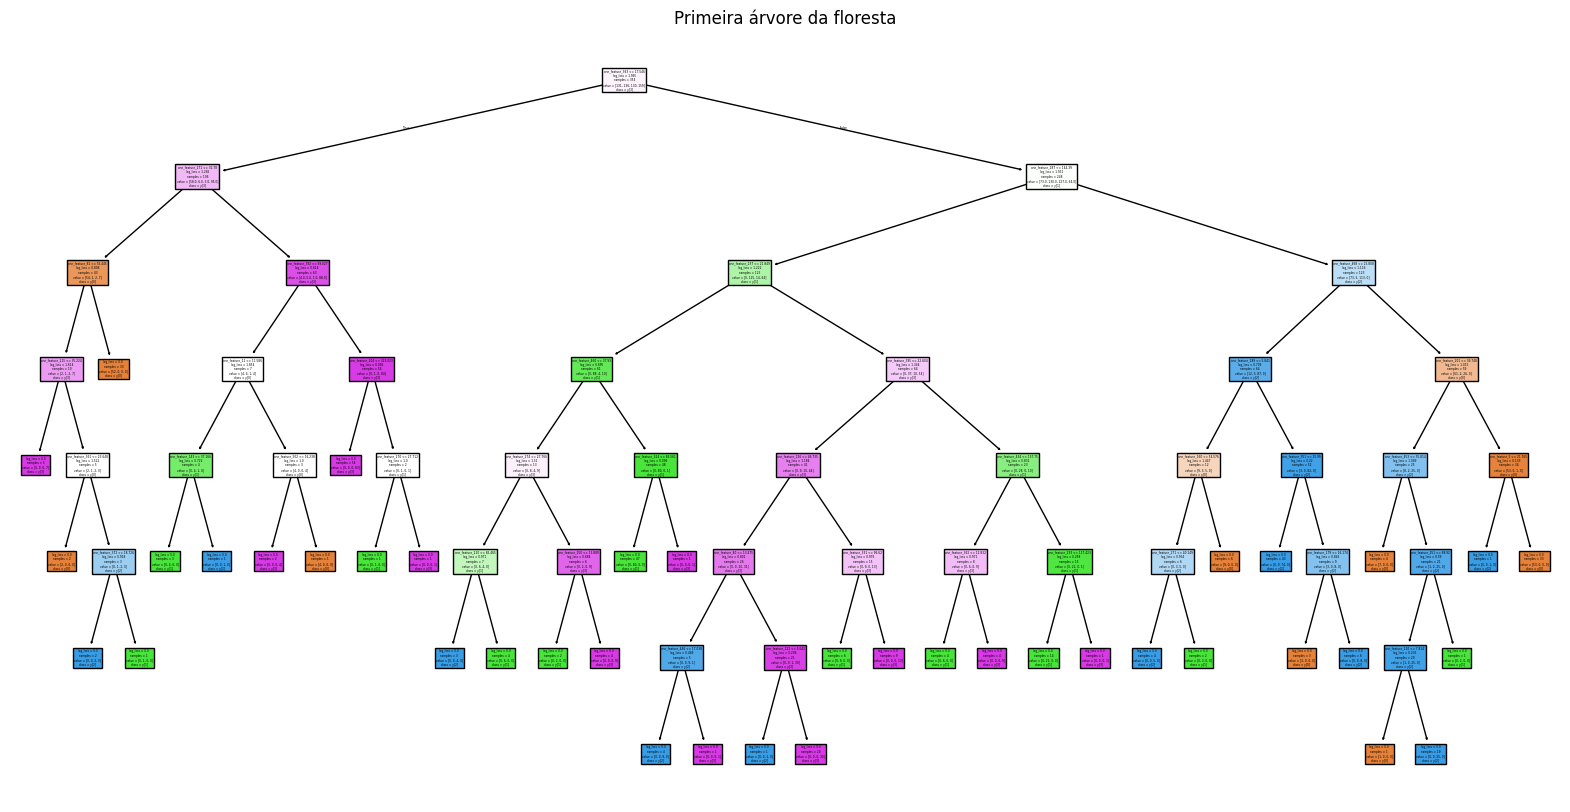

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.97490
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 1  2  0 50]]


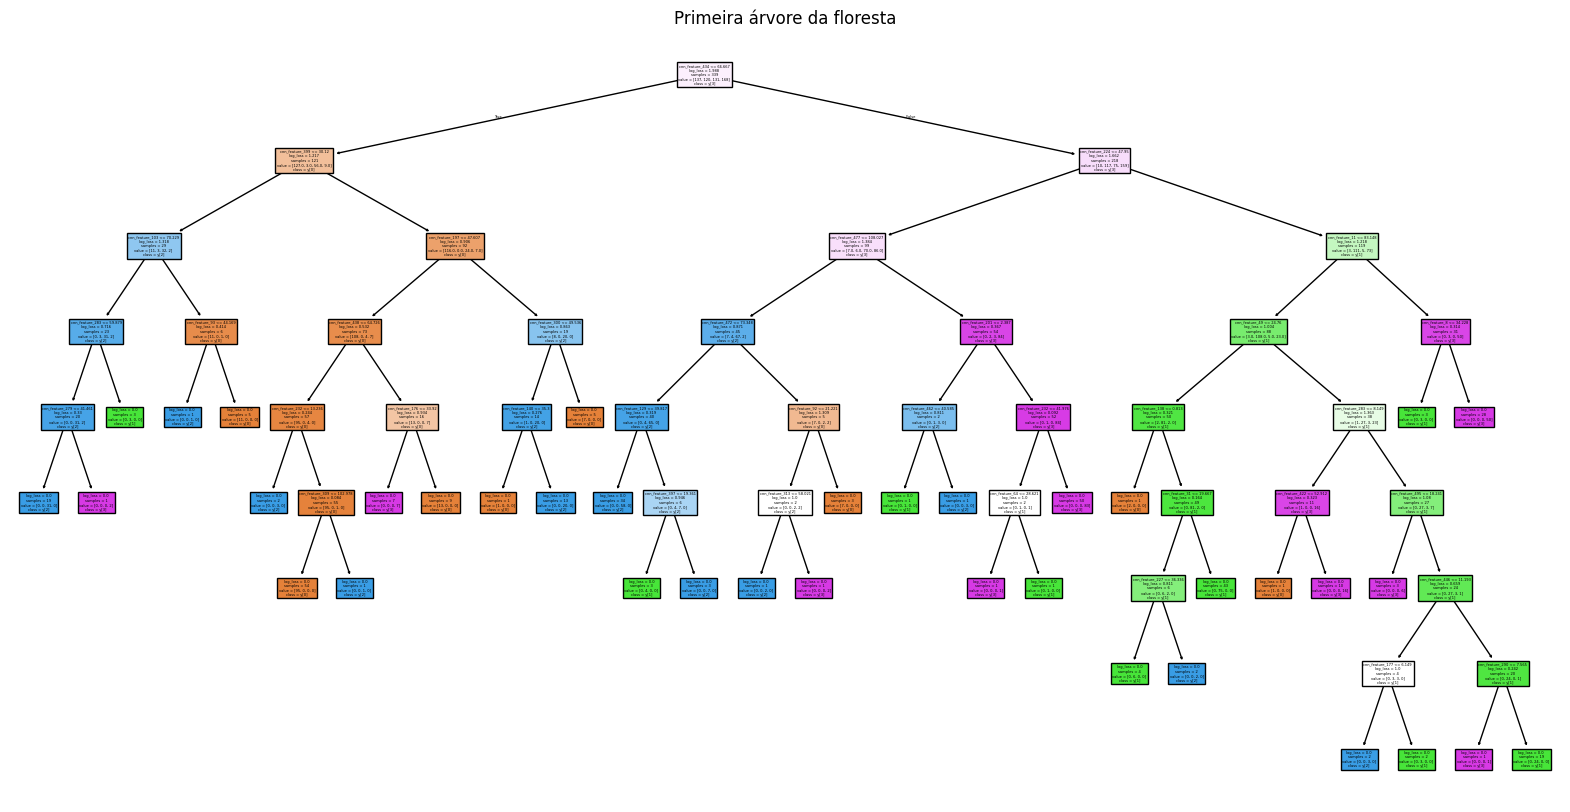

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  1 64  0]
 [ 0  2  0 51]]

--------------------- cnn_VGG16_256_avg ---------------------


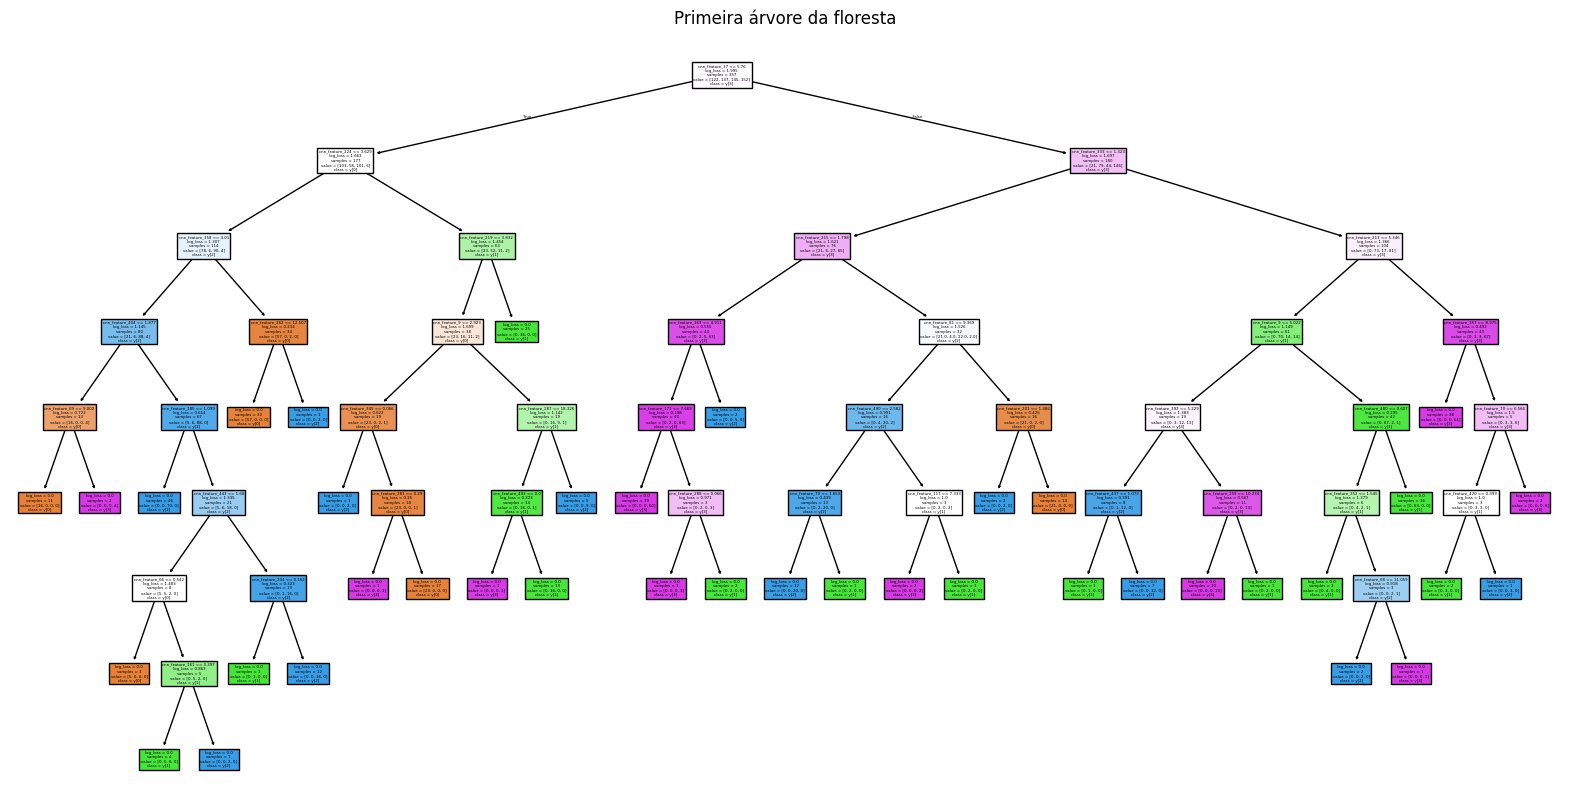

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.96234
[[63  0  1  0]
 [ 0 56  0  1]
 [ 0  4 61  0]
 [ 1  2  0 50]]


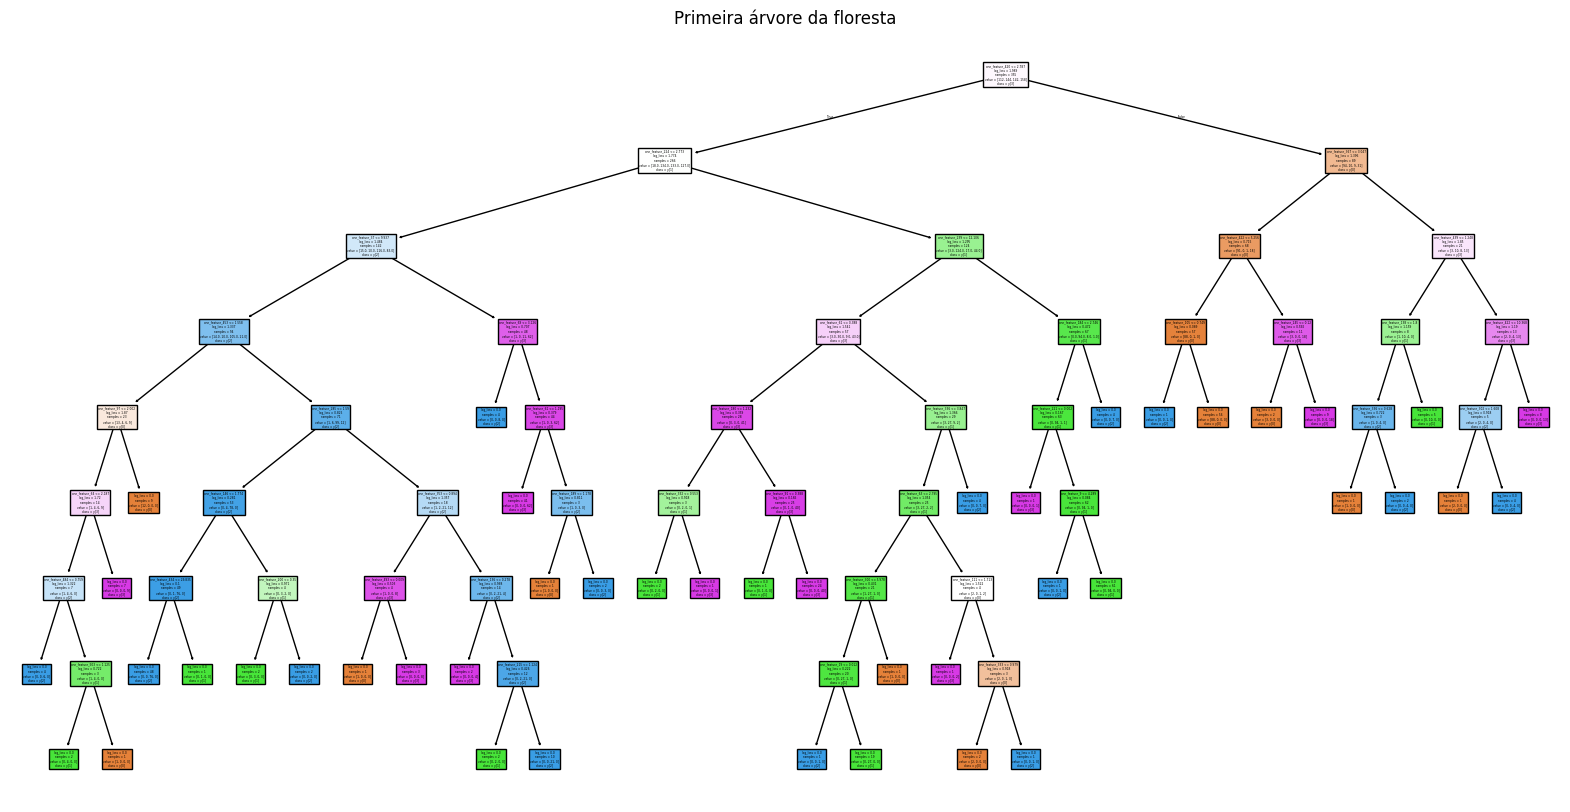

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  1 64  0]
 [ 0  2  0 51]]


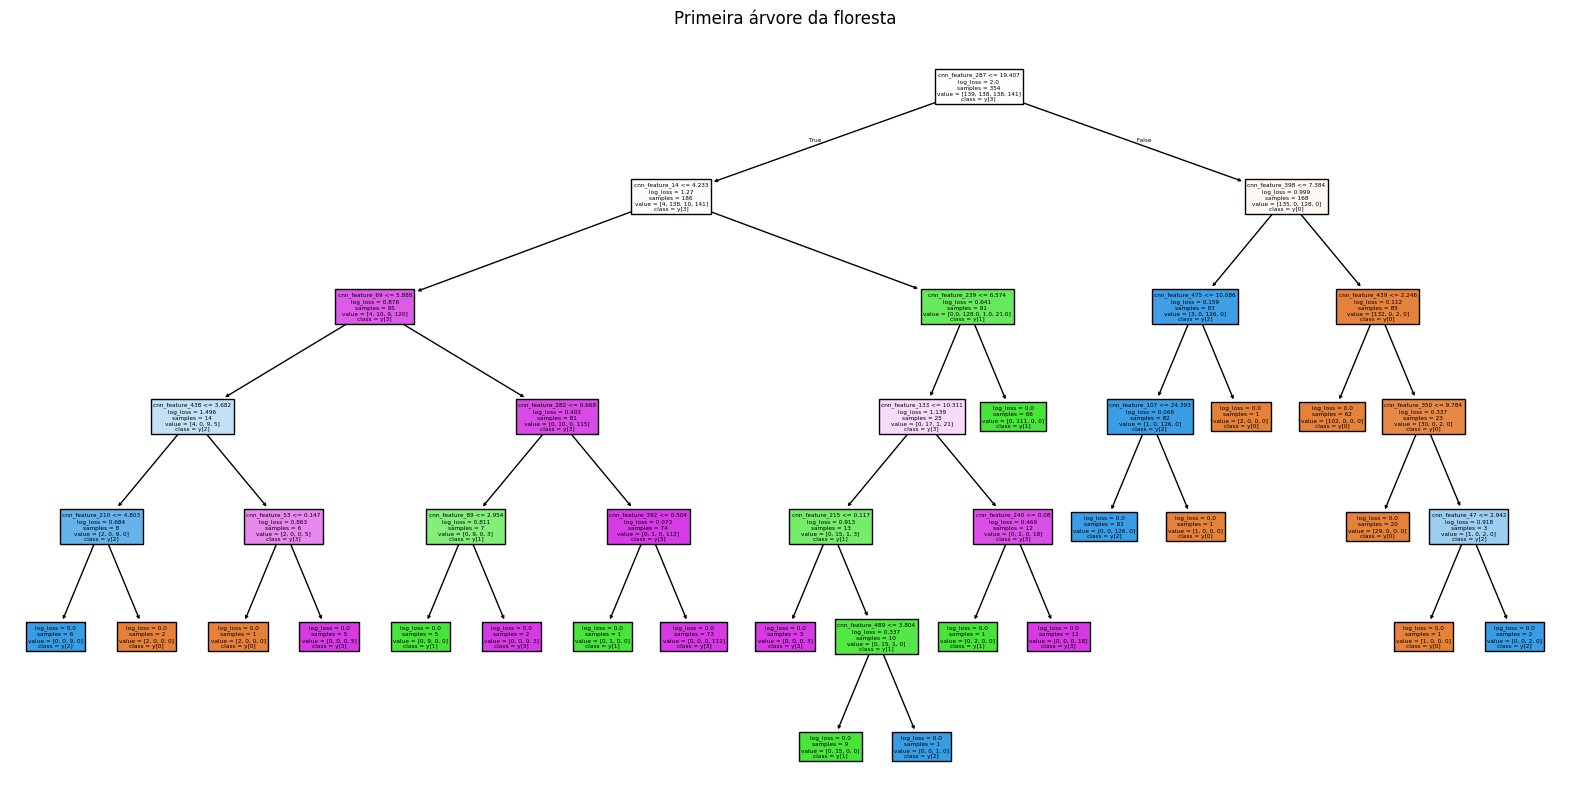

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  1 64  0]
 [ 0  1  1 51]]


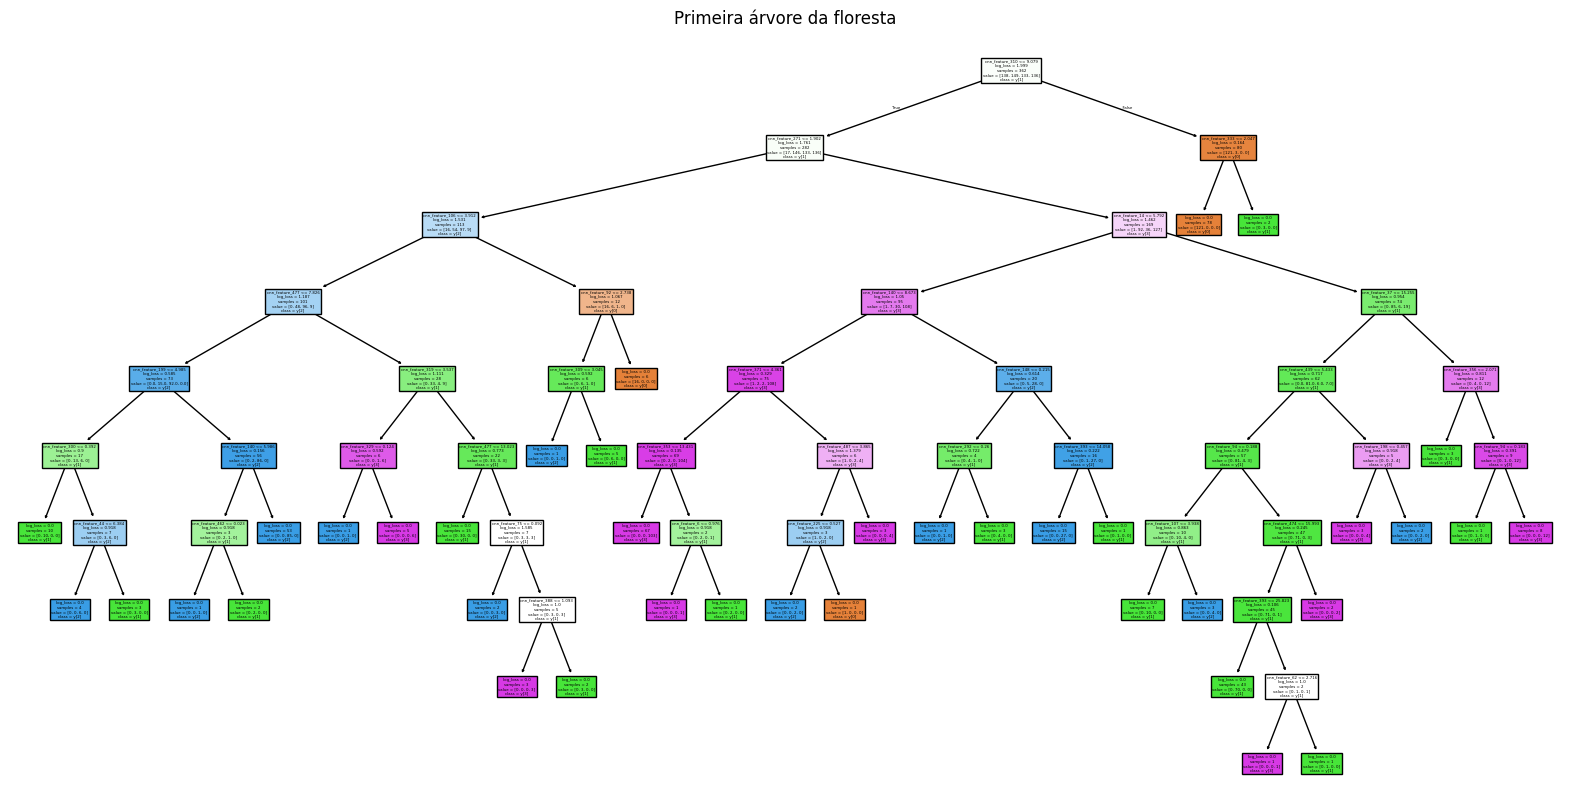

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 55  1  1]
 [ 0  1 64  0]
 [ 0  1  0 52]]

--------------------- cnn_VGG19_128_max ---------------------


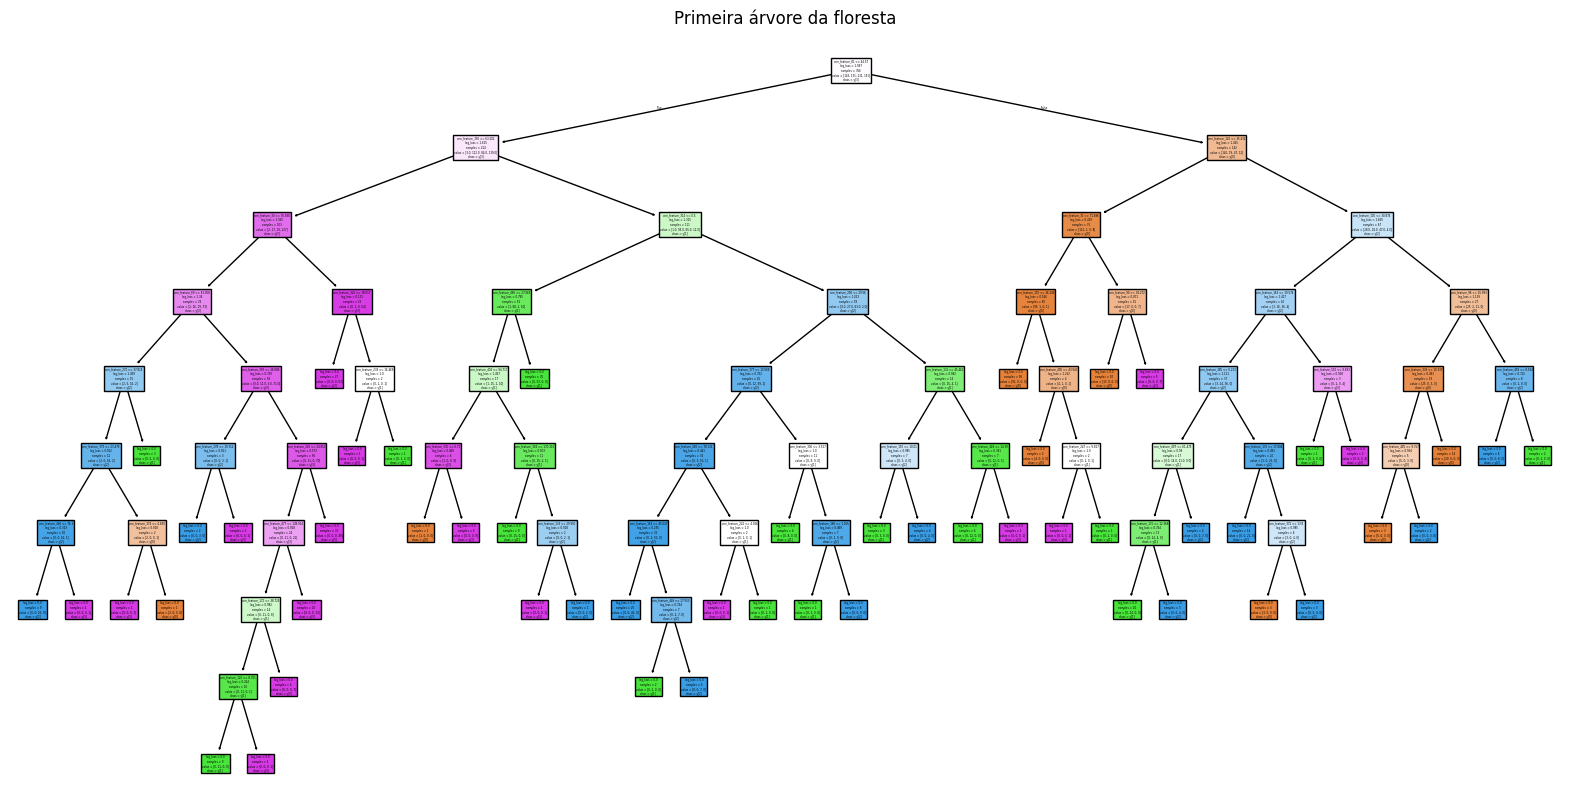

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.88703
[[56  0  6  2]
 [ 0 53  2  2]
 [ 2  3 60  0]
 [ 1  9  0 43]]


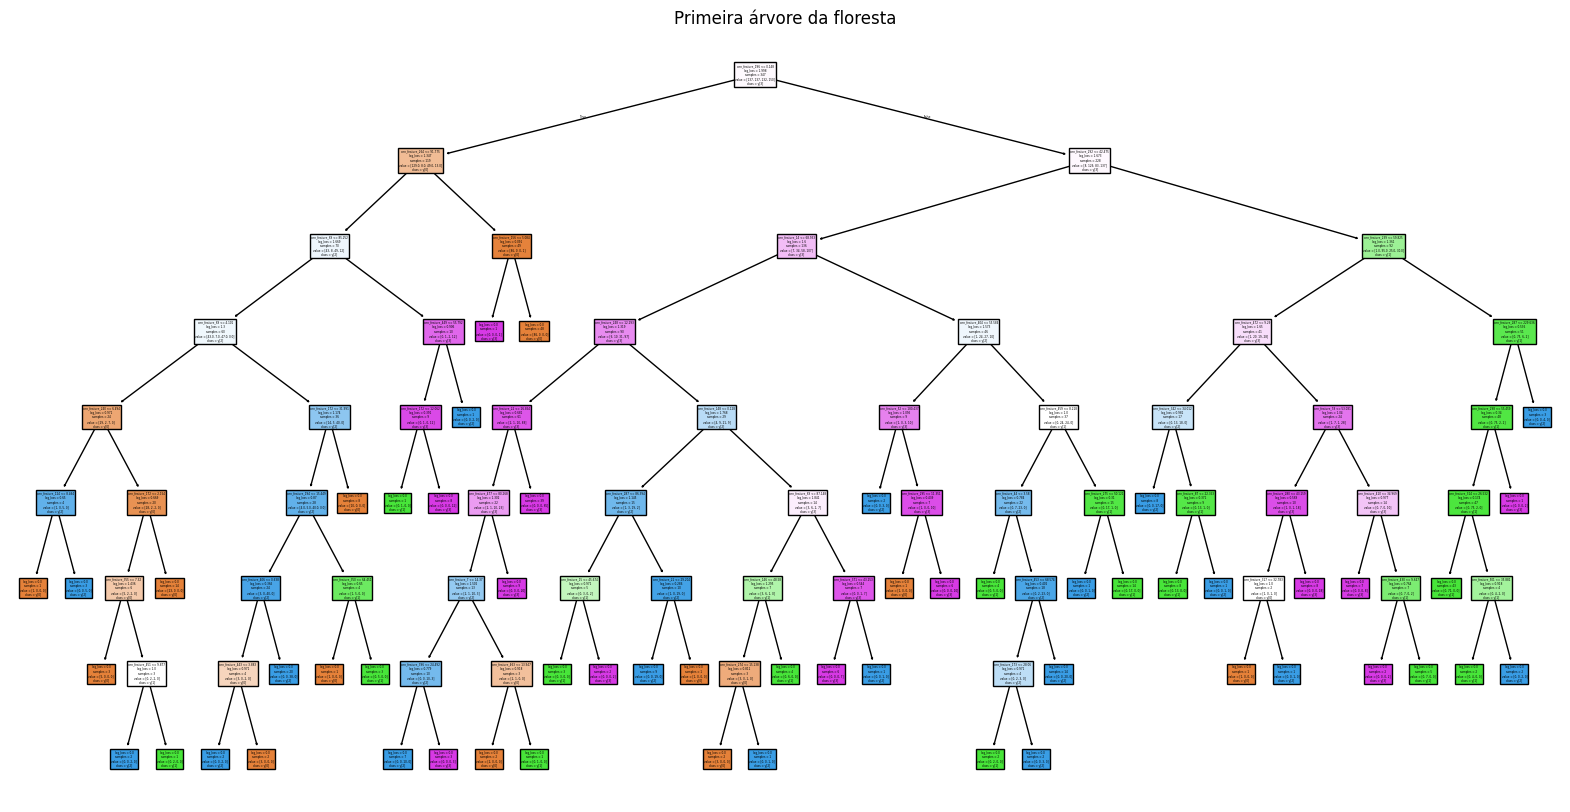

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.89958
[[64  0  0  0]
 [ 0 48  6  3]
 [ 0  4 59  2]
 [ 2  5  2 44]]


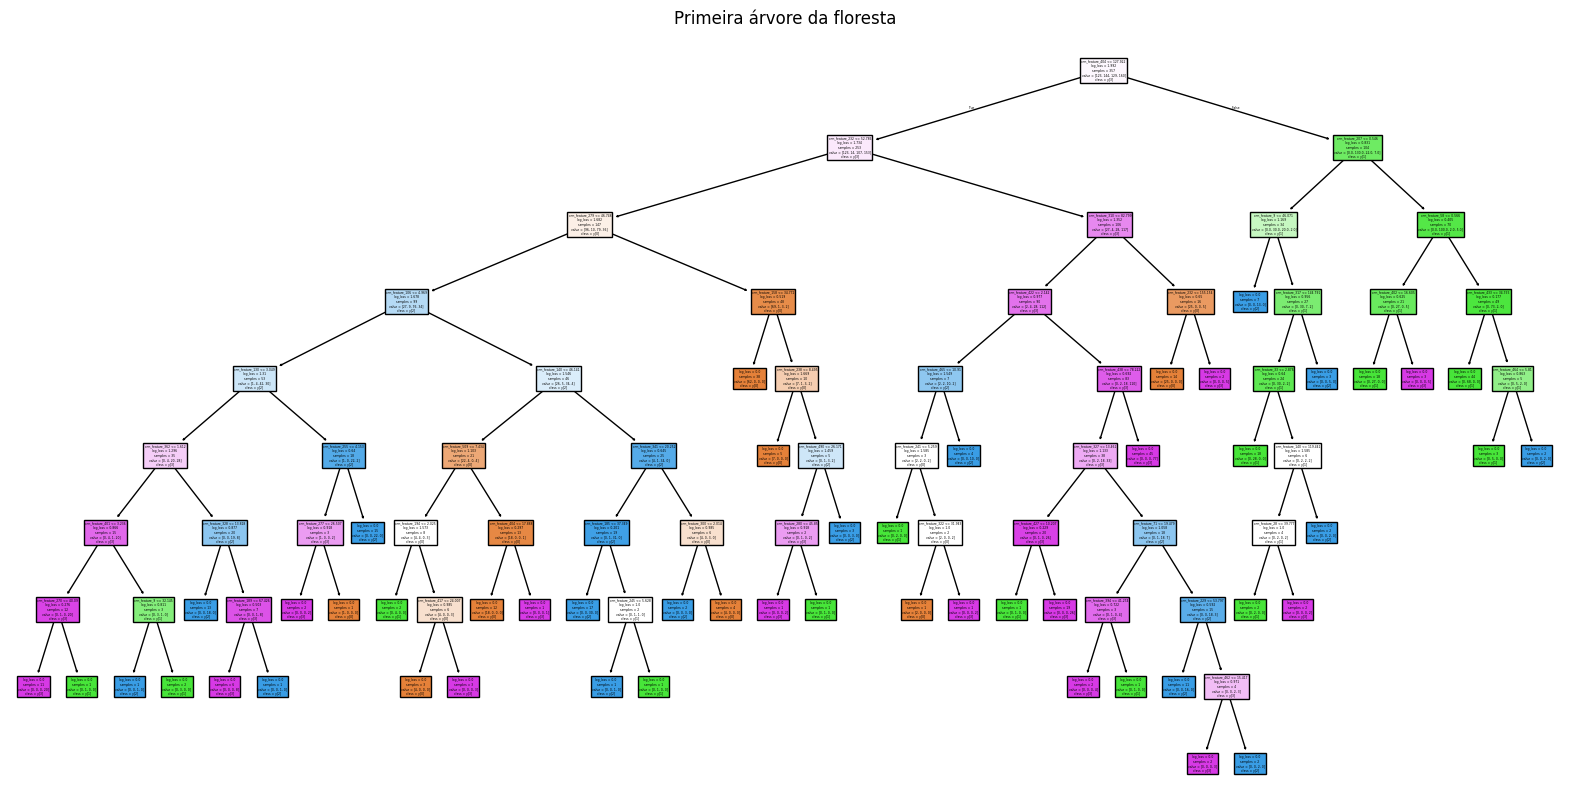

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.92887
[[63  0  1  0]
 [ 1 51  0  5]
 [ 1  1 62  1]
 [ 1  3  3 46]]


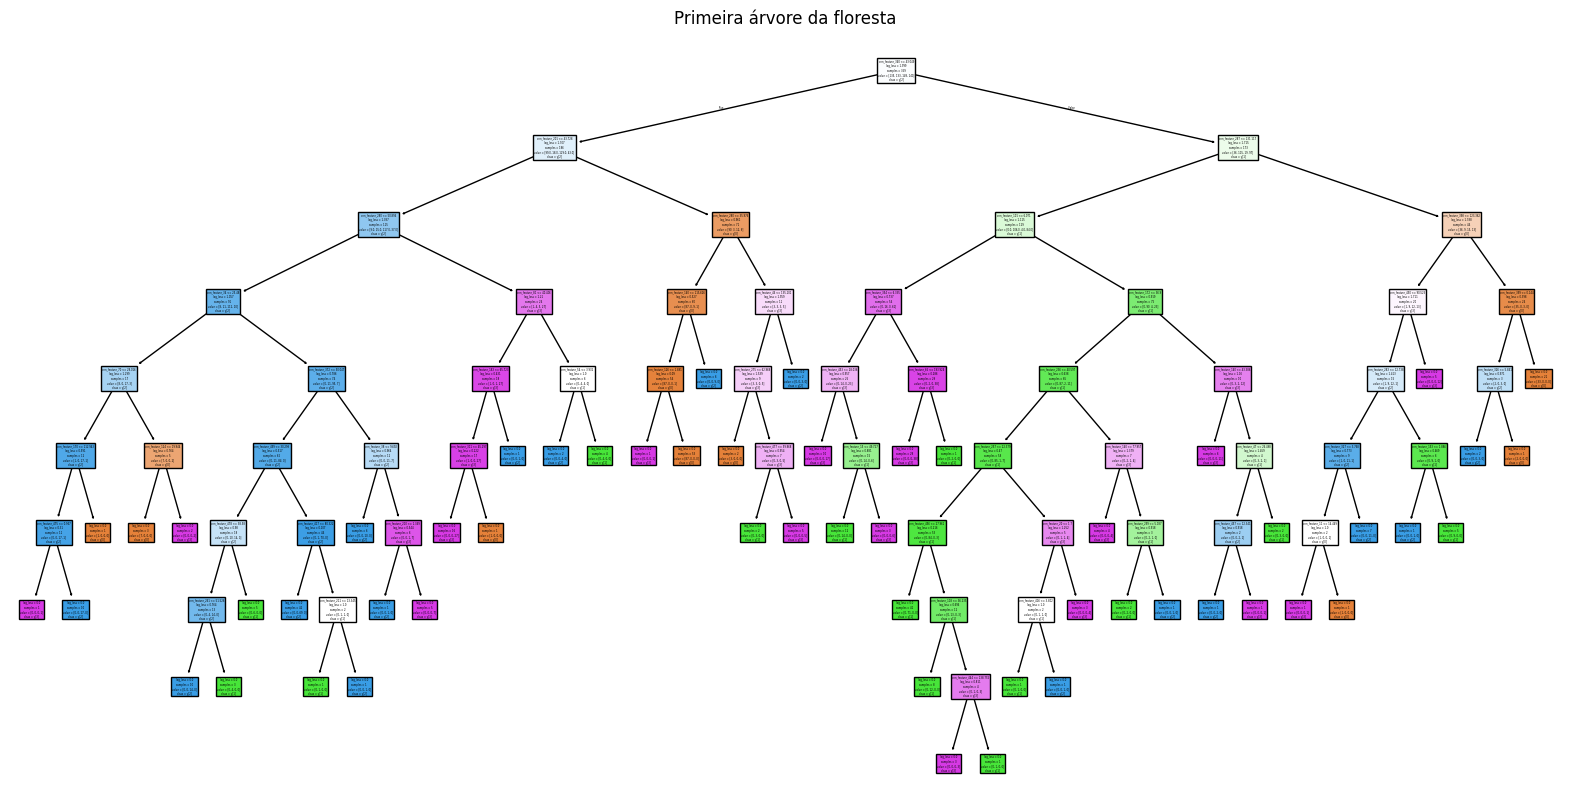

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.93724
[[63  0  1  0]
 [ 0 50  4  3]
 [ 1  2 62  0]
 [ 1  2  1 49]]

--------------------- cnn_VGG19_256_max ---------------------


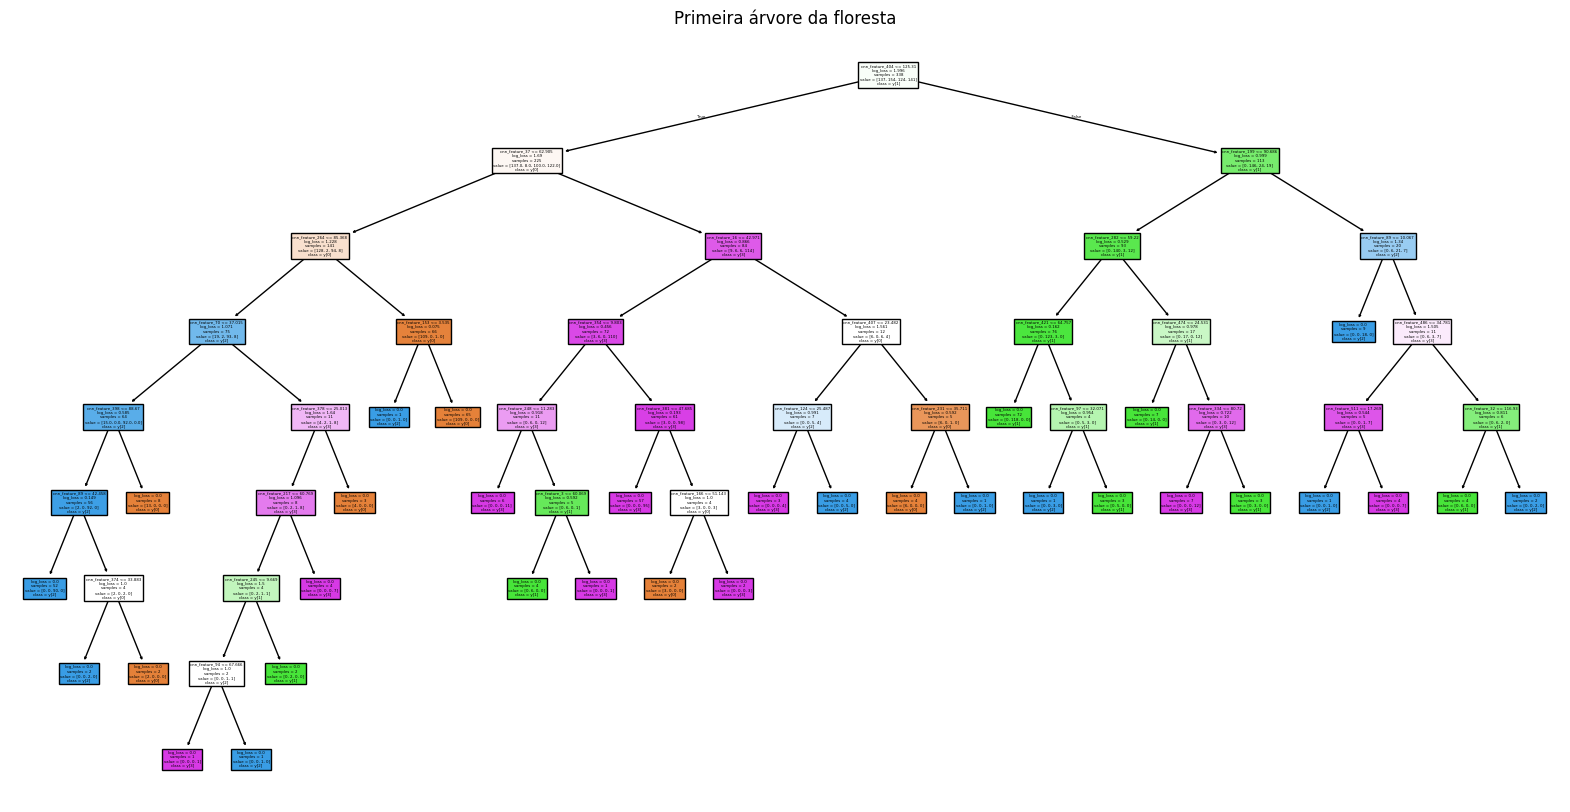

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.94561
[[62  0  2  0]
 [ 0 54  2  1]
 [ 3  2 60  0]
 [ 1  1  1 50]]


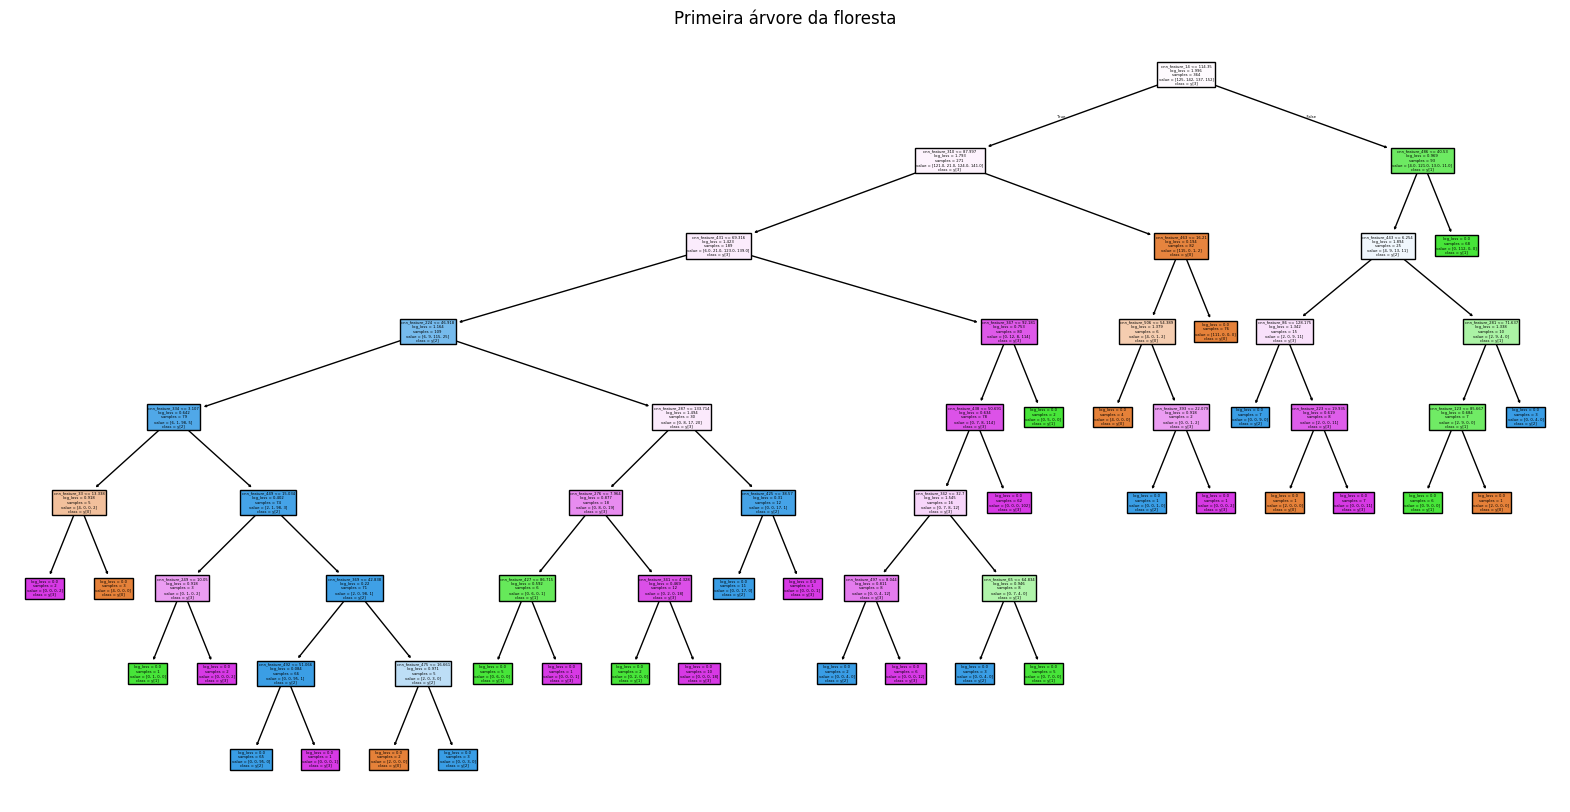

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.98326
[[64  0  0  0]
 [ 0 55  1  1]
 [ 1  0 64  0]
 [ 0  1  0 52]]


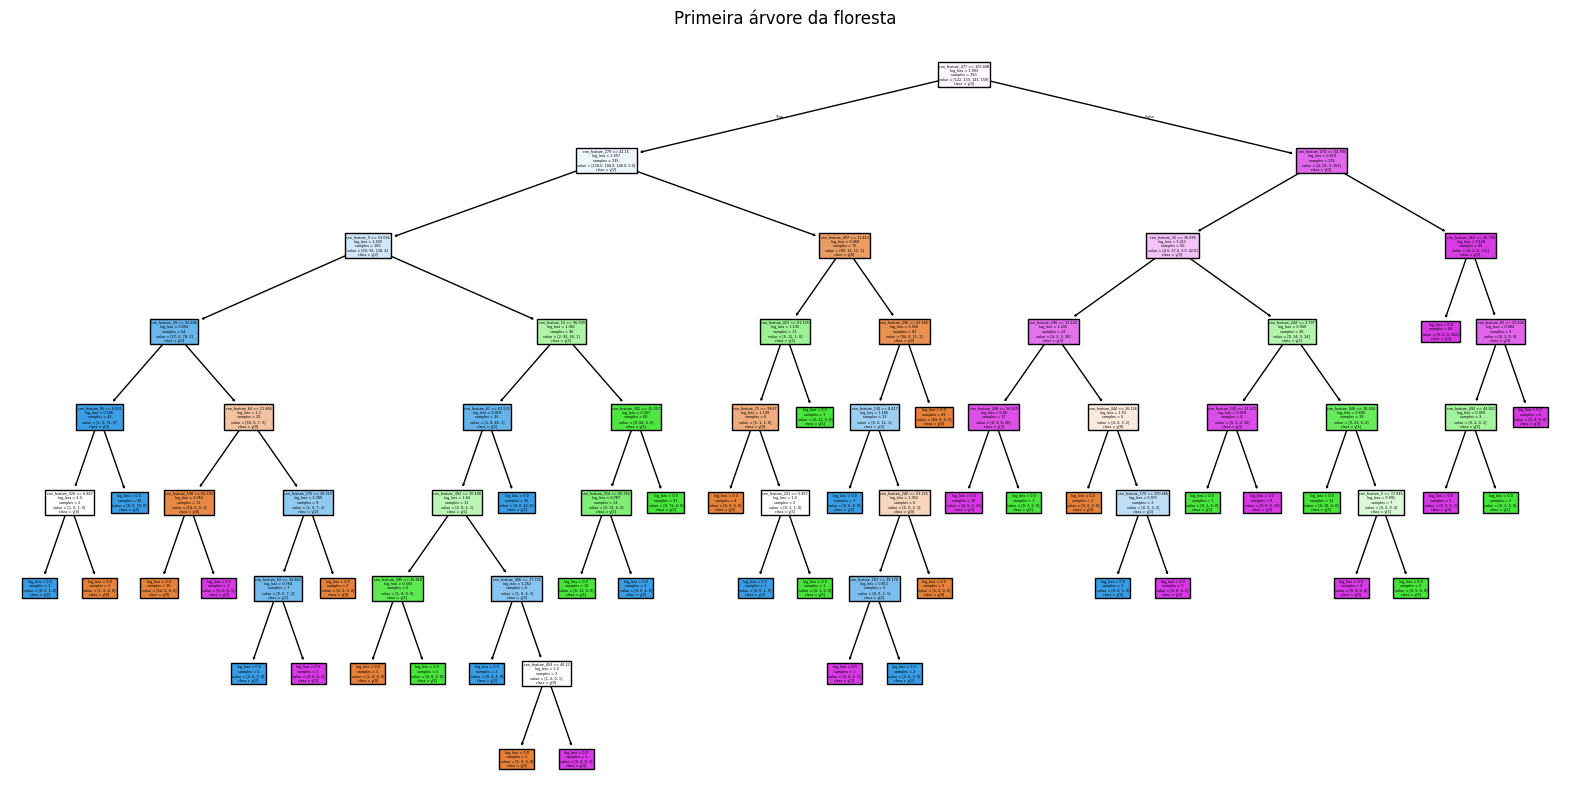

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.96653
[[61  0  2  1]
 [ 0 55  1  1]
 [ 1  0 64  0]
 [ 1  1  0 51]]


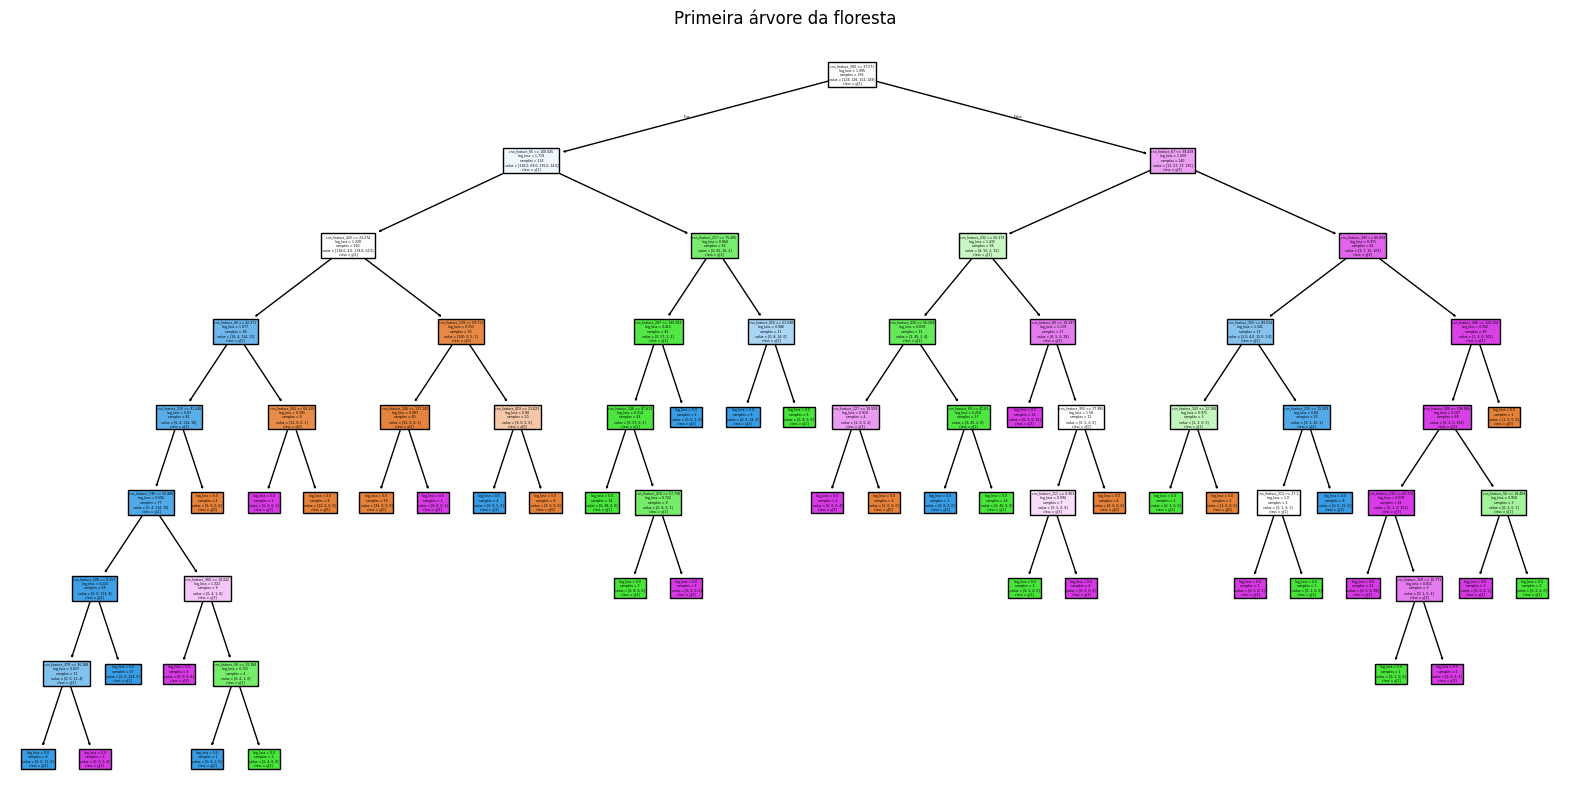

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.98326
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]

--------------------- cnn_VGG19_128_avg ---------------------


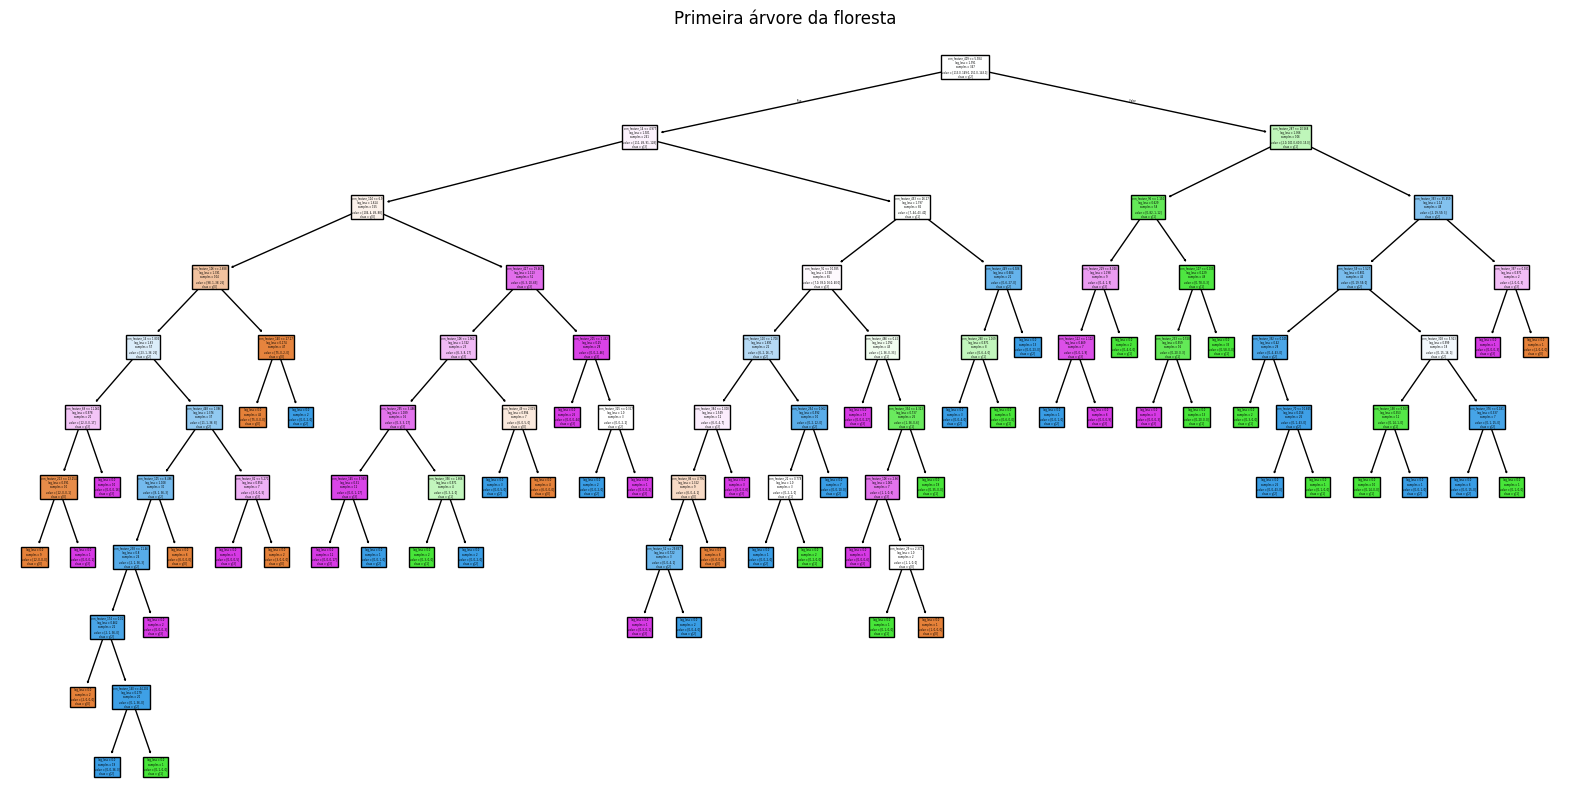

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.88285
[[62  0  2  0]
 [ 0 48  4  5]
 [ 1  4 58  2]
 [ 1  4  5 43]]


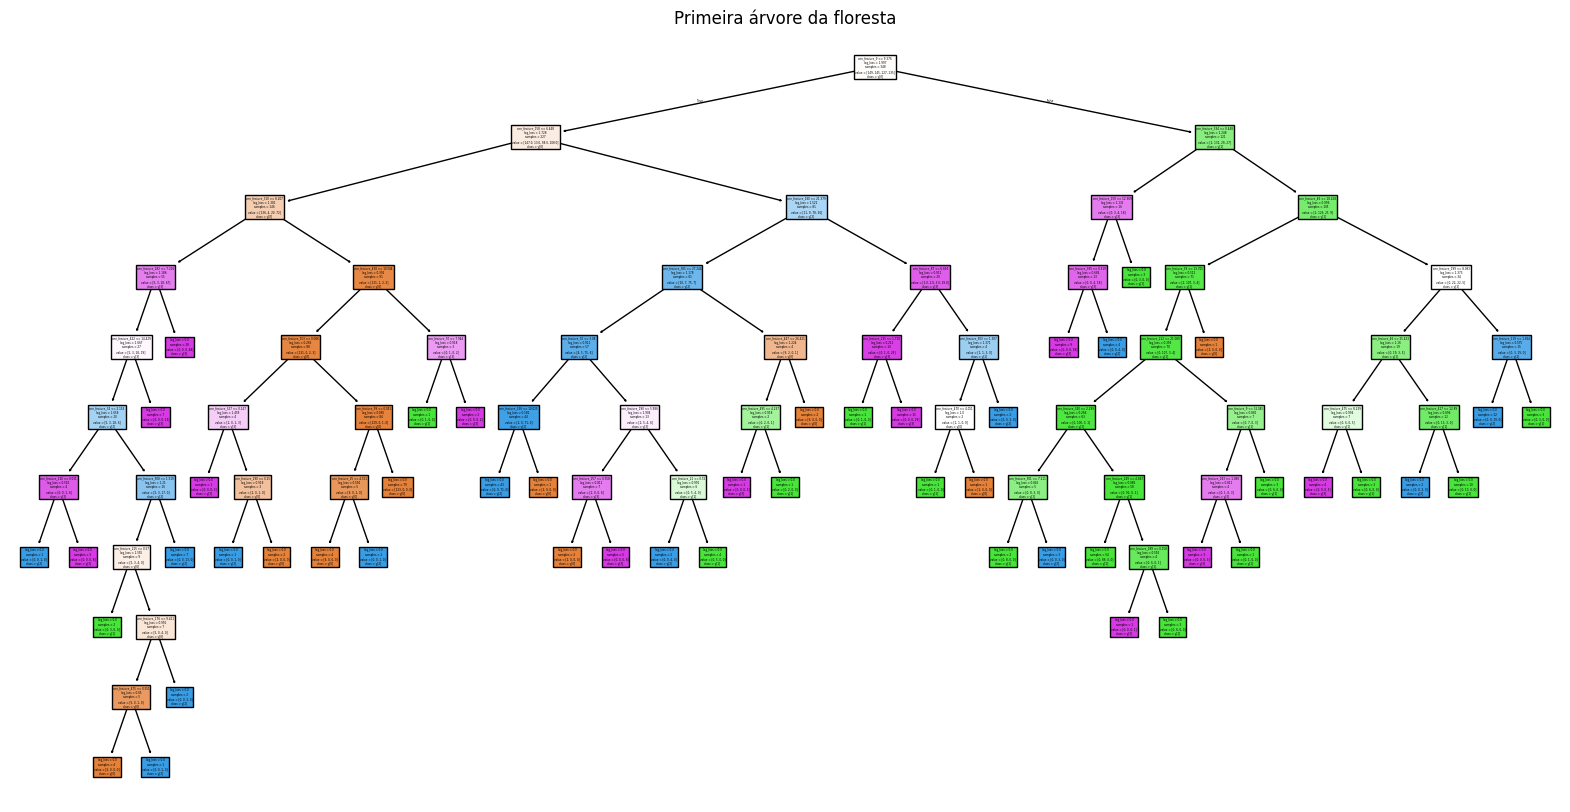

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.94142
[[60  0  2  2]
 [ 1 52  2  2]
 [ 0  1 63  1]
 [ 0  1  2 50]]


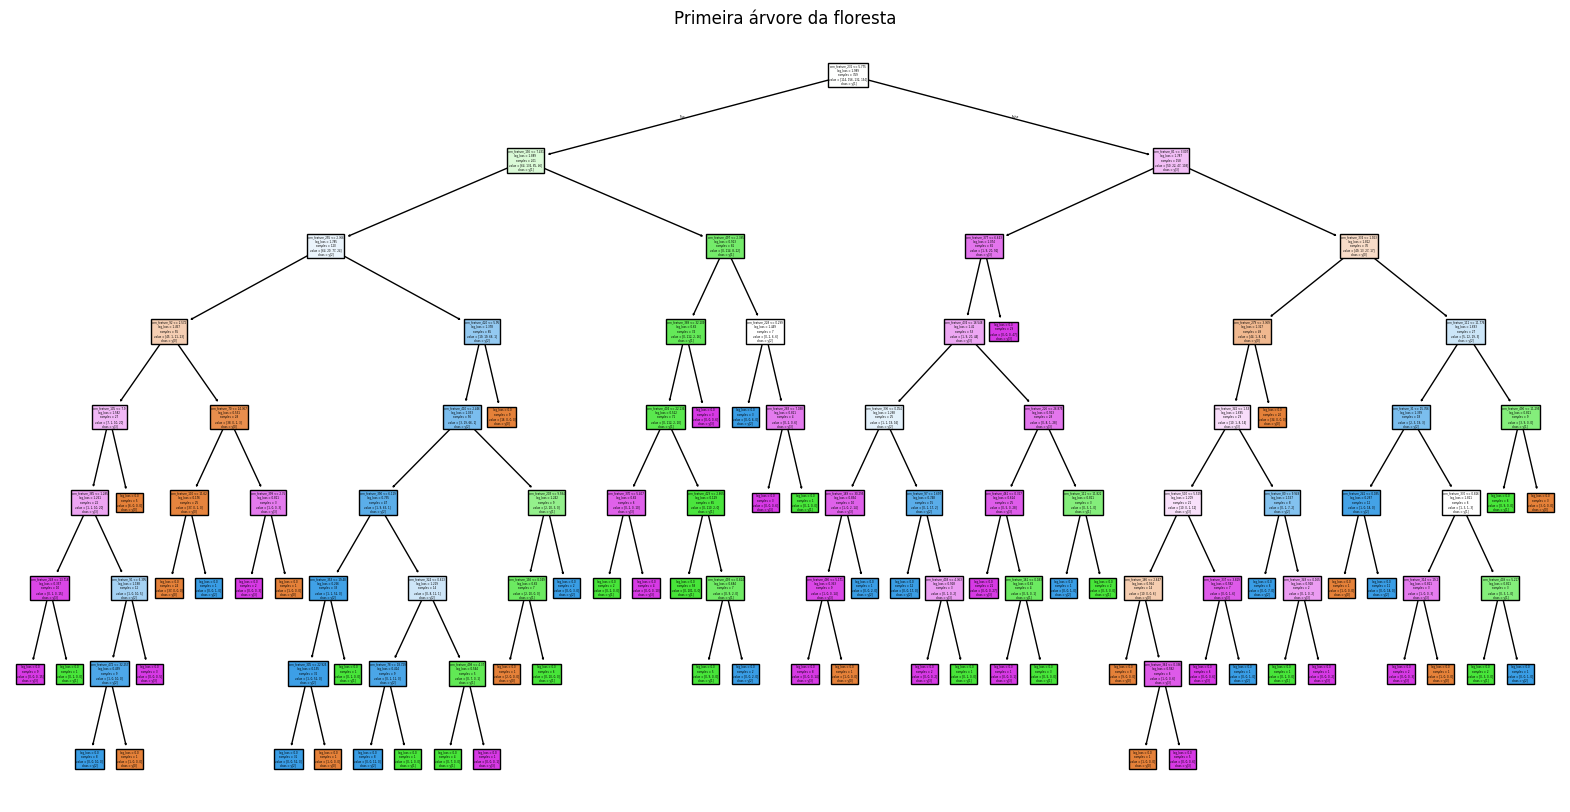

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.92887
[[62  0  2  0]
 [ 0 51  3  3]
 [ 1  3 61  0]
 [ 1  3  1 48]]


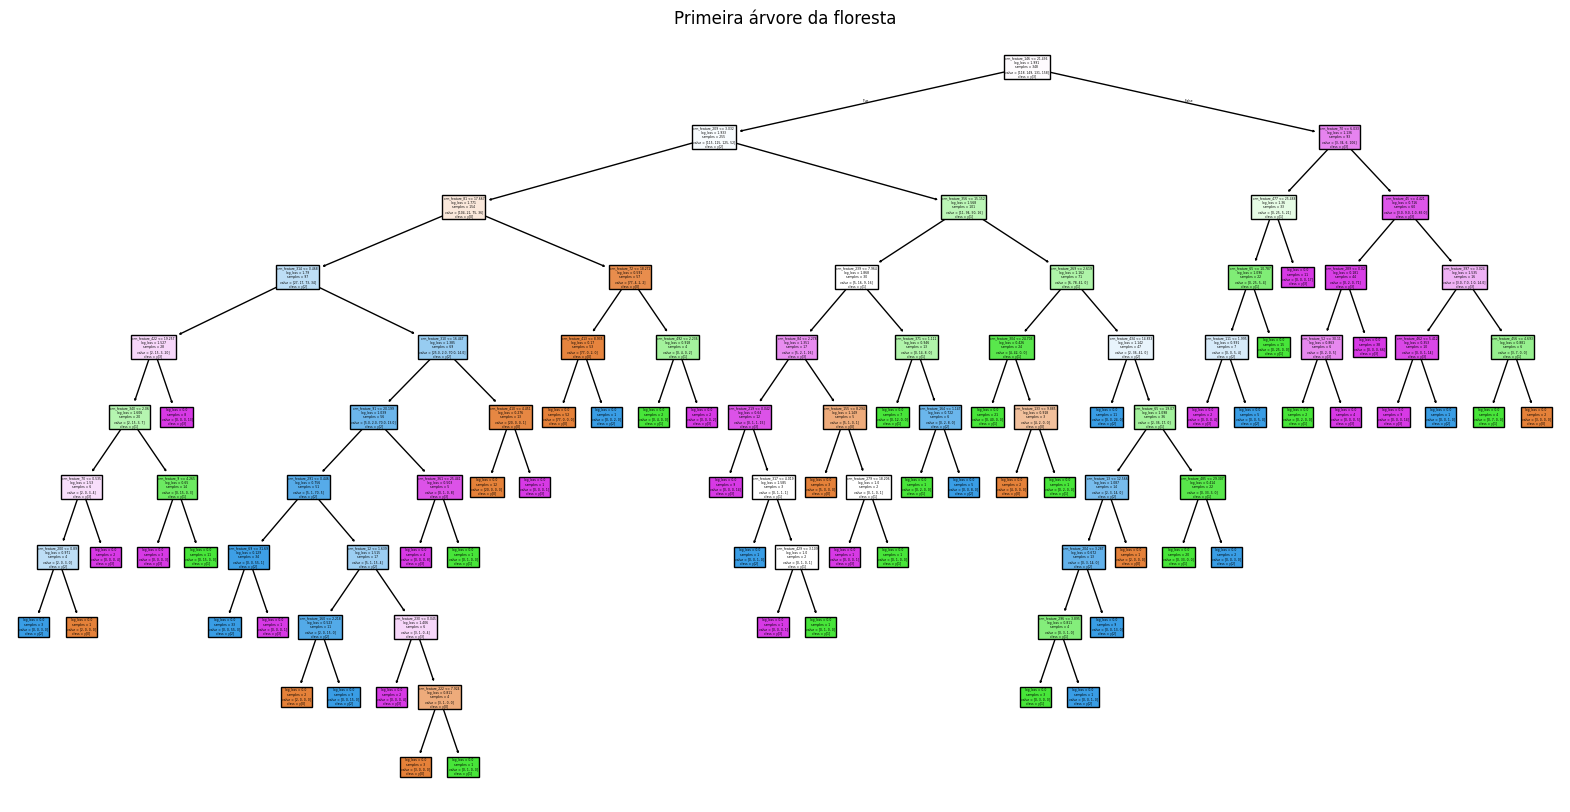

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.95397
[[62  0  2  0]
 [ 0 51  3  3]
 [ 0  0 65  0]
 [ 1  1  1 50]]

--------------------- cnn_VGG19_256_avg ---------------------


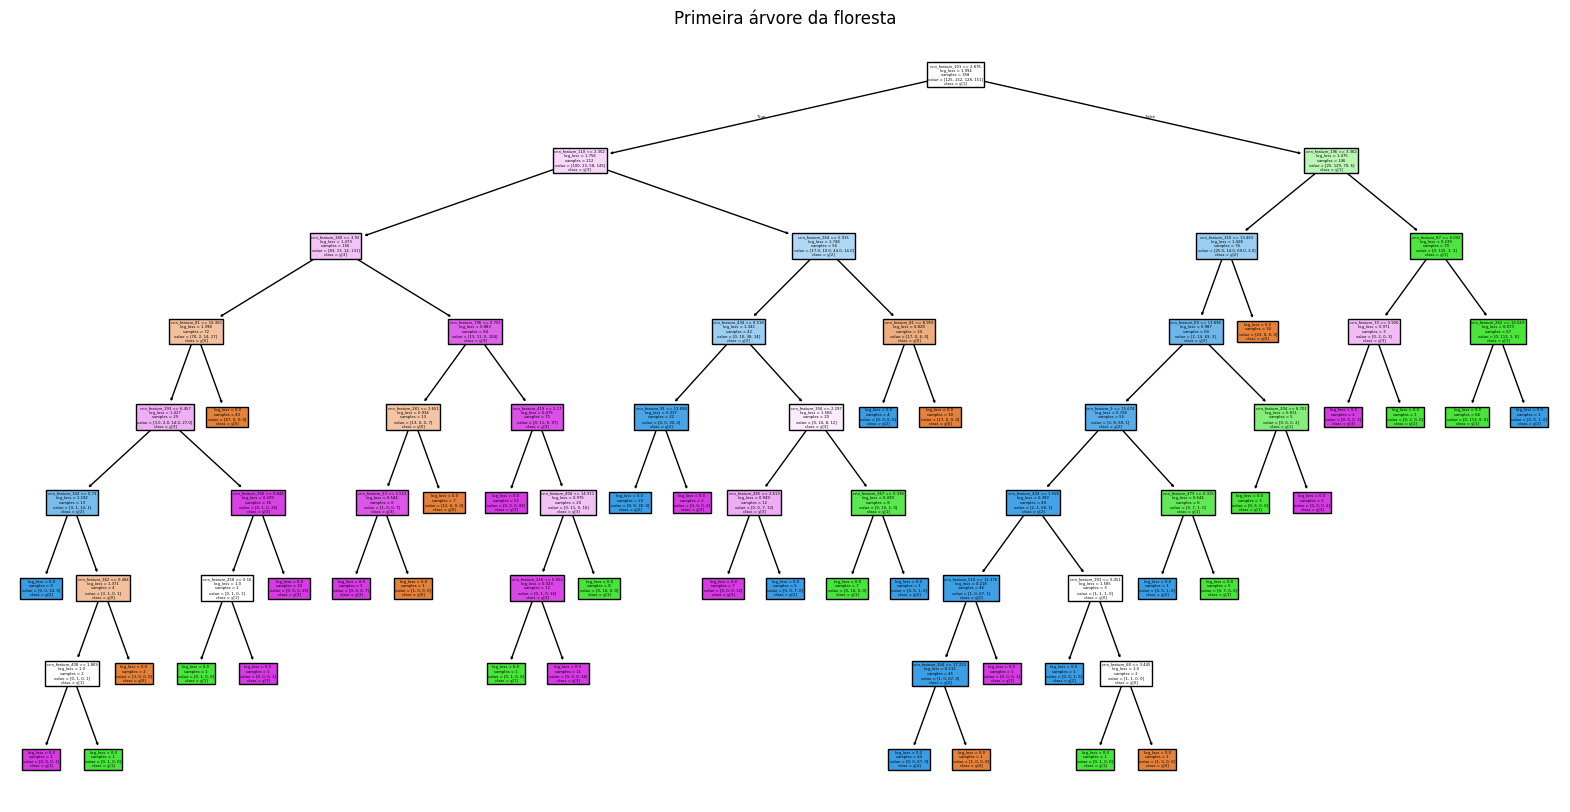

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.97908
[[62  0  2  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 1  1  0 51]]


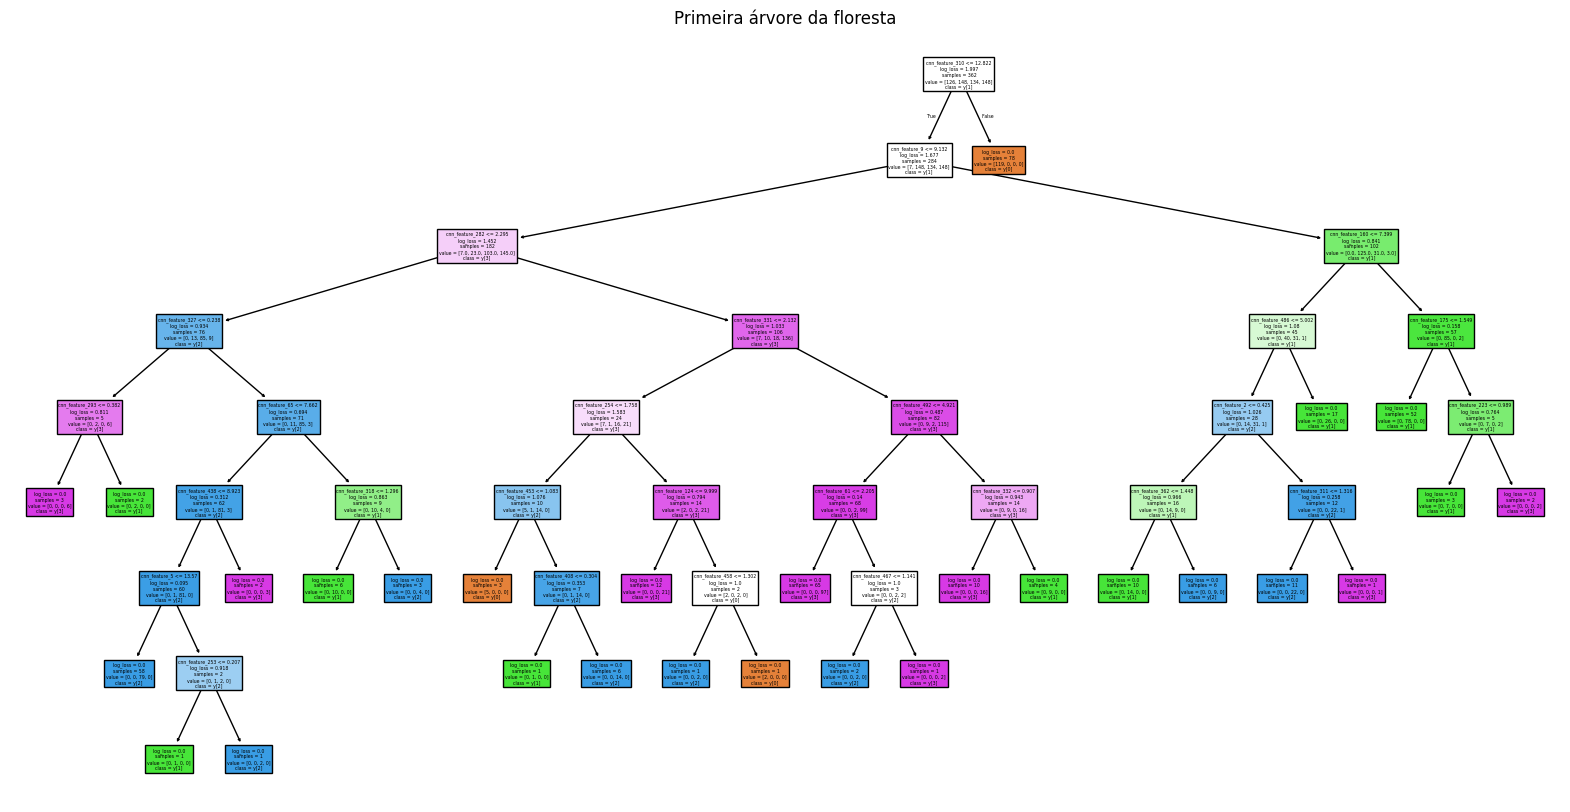

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.97908
[[62  0  2  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


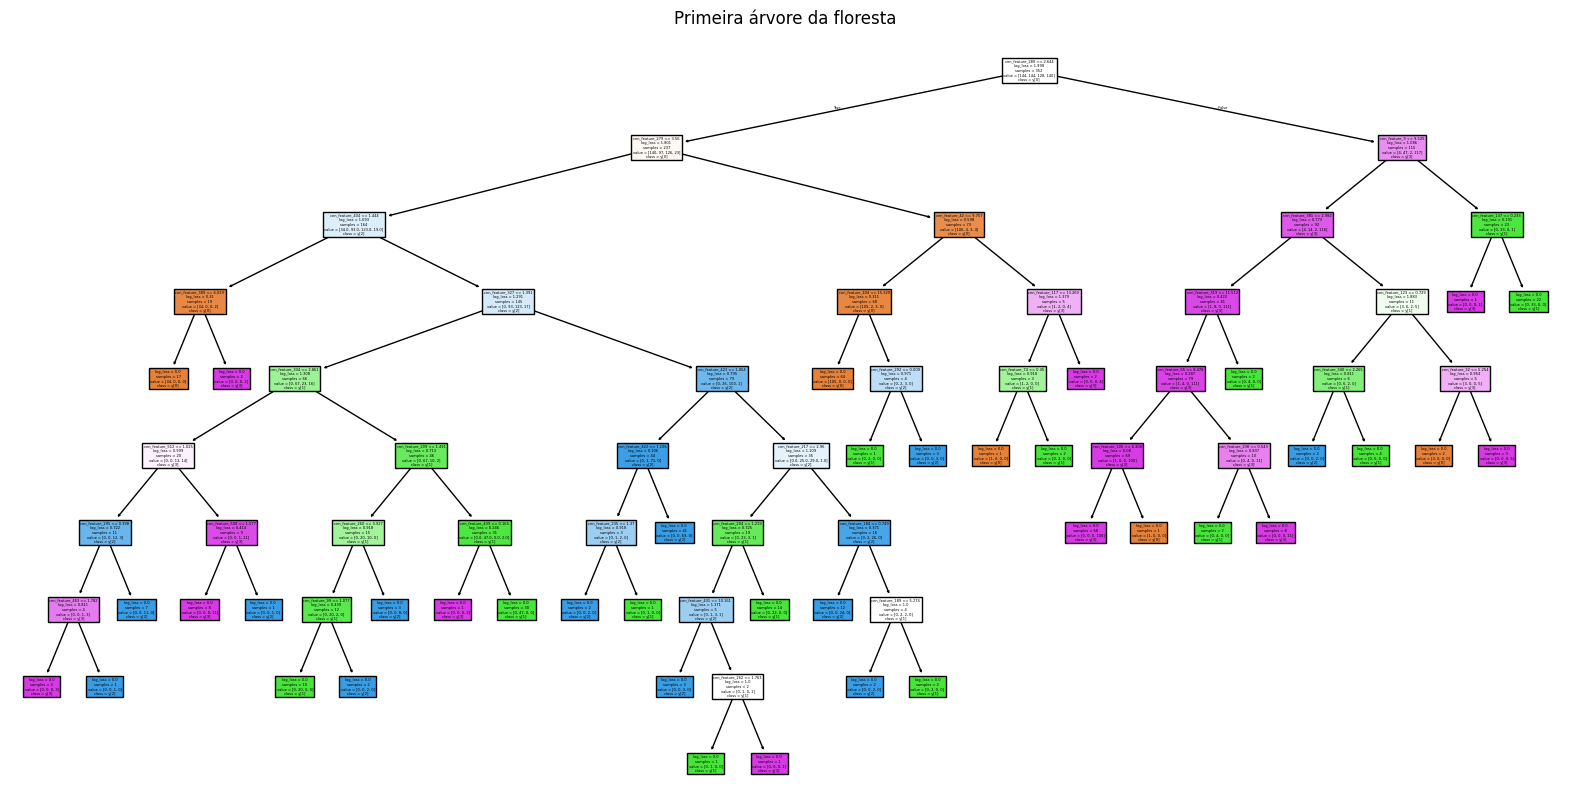

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.96234
[[61  0  3  0]
 [ 0 53  3  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


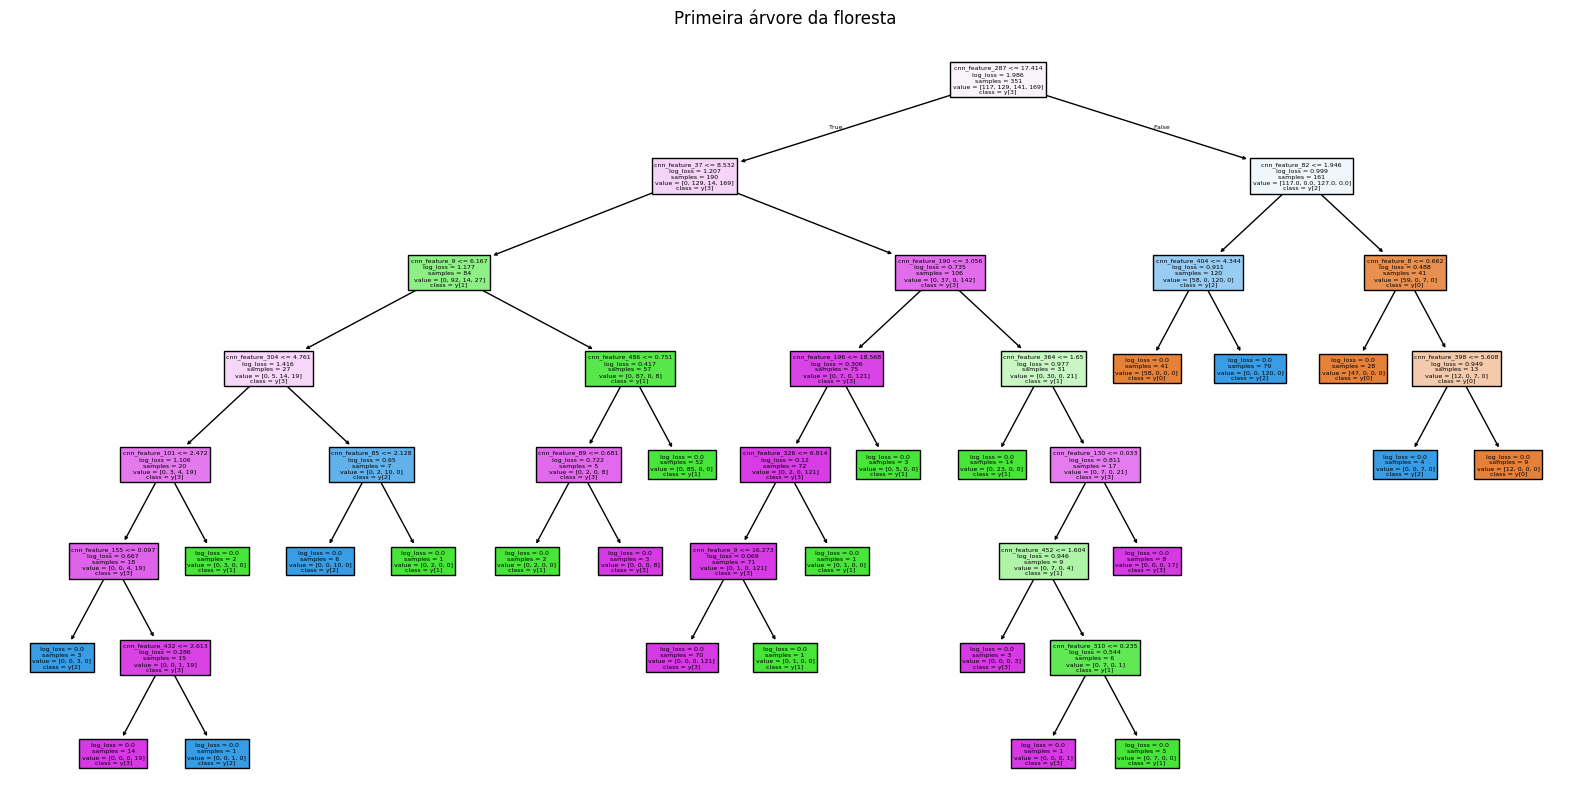

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.98326
[[62  0  2  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]

--------------------- PCA_cnn_VGG16_256_max ---------------------


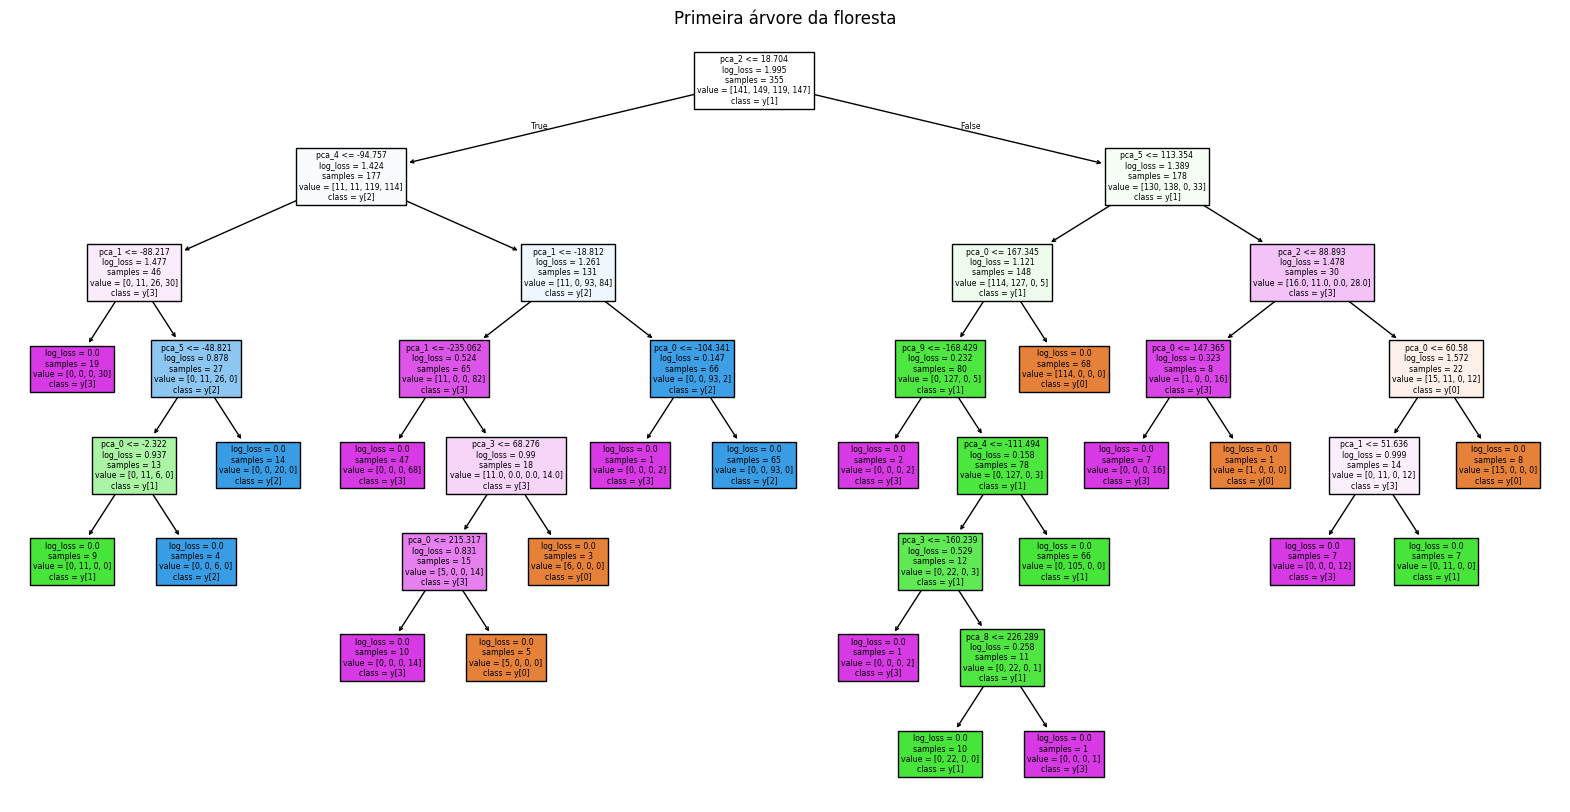

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.99163
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]


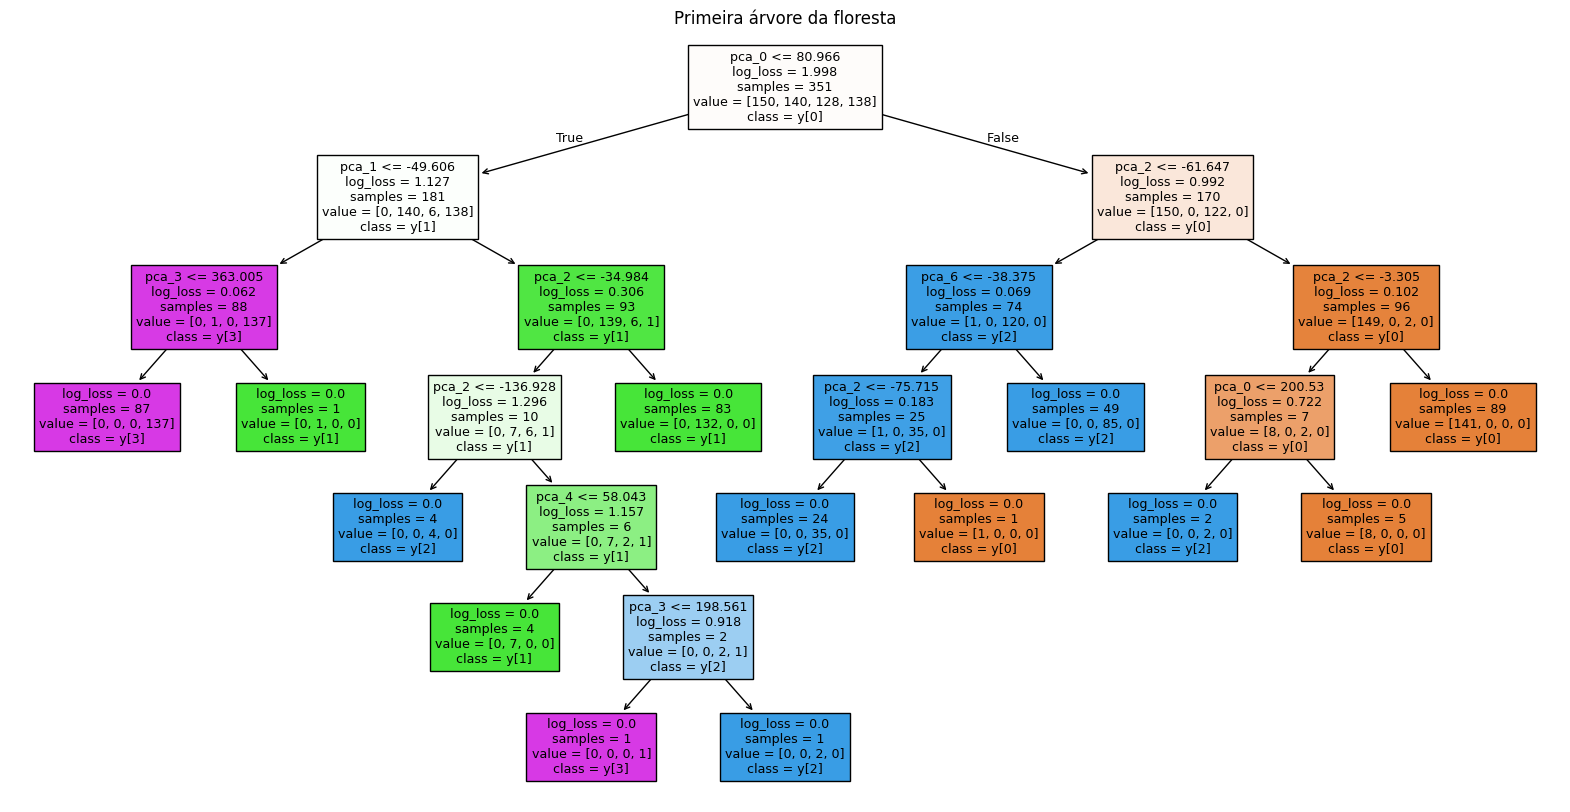

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.99163
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]


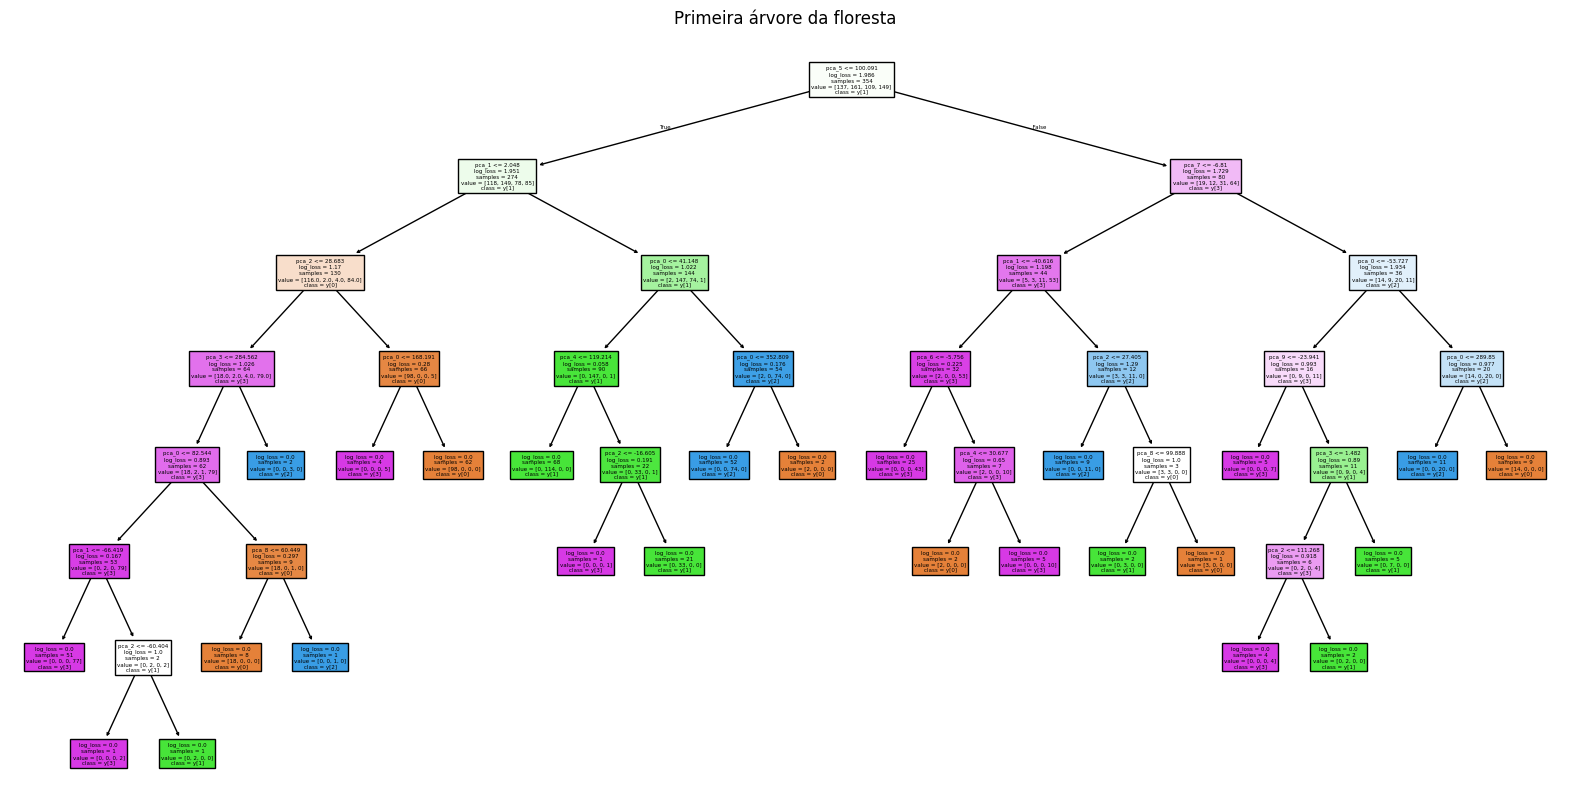

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.98745
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  1 64  0]
 [ 0  1  0 52]]


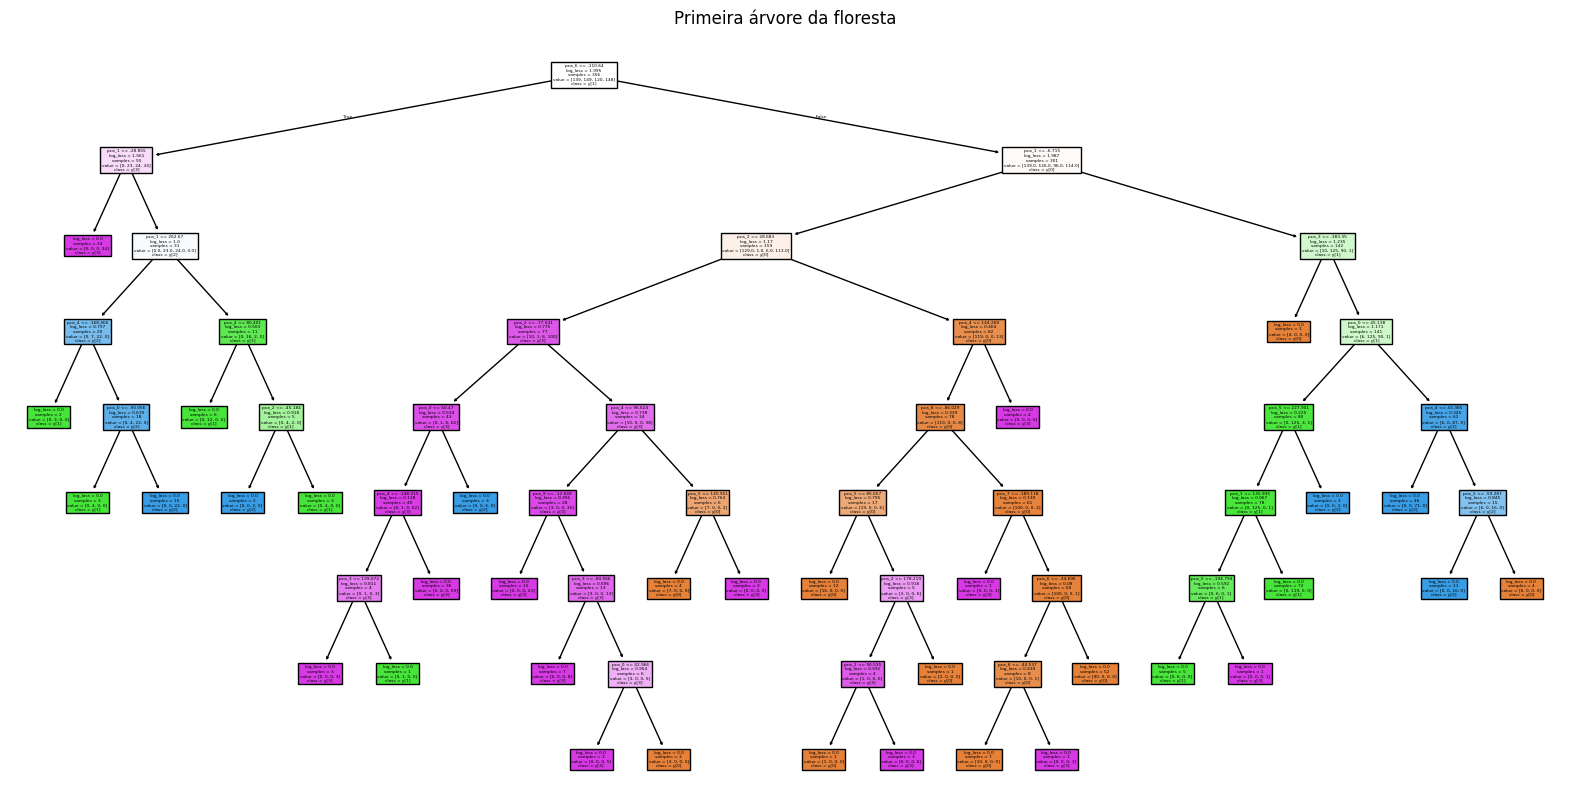

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.99163
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]

--------------------- PCA_cnn_VGG16_256_avg ---------------------


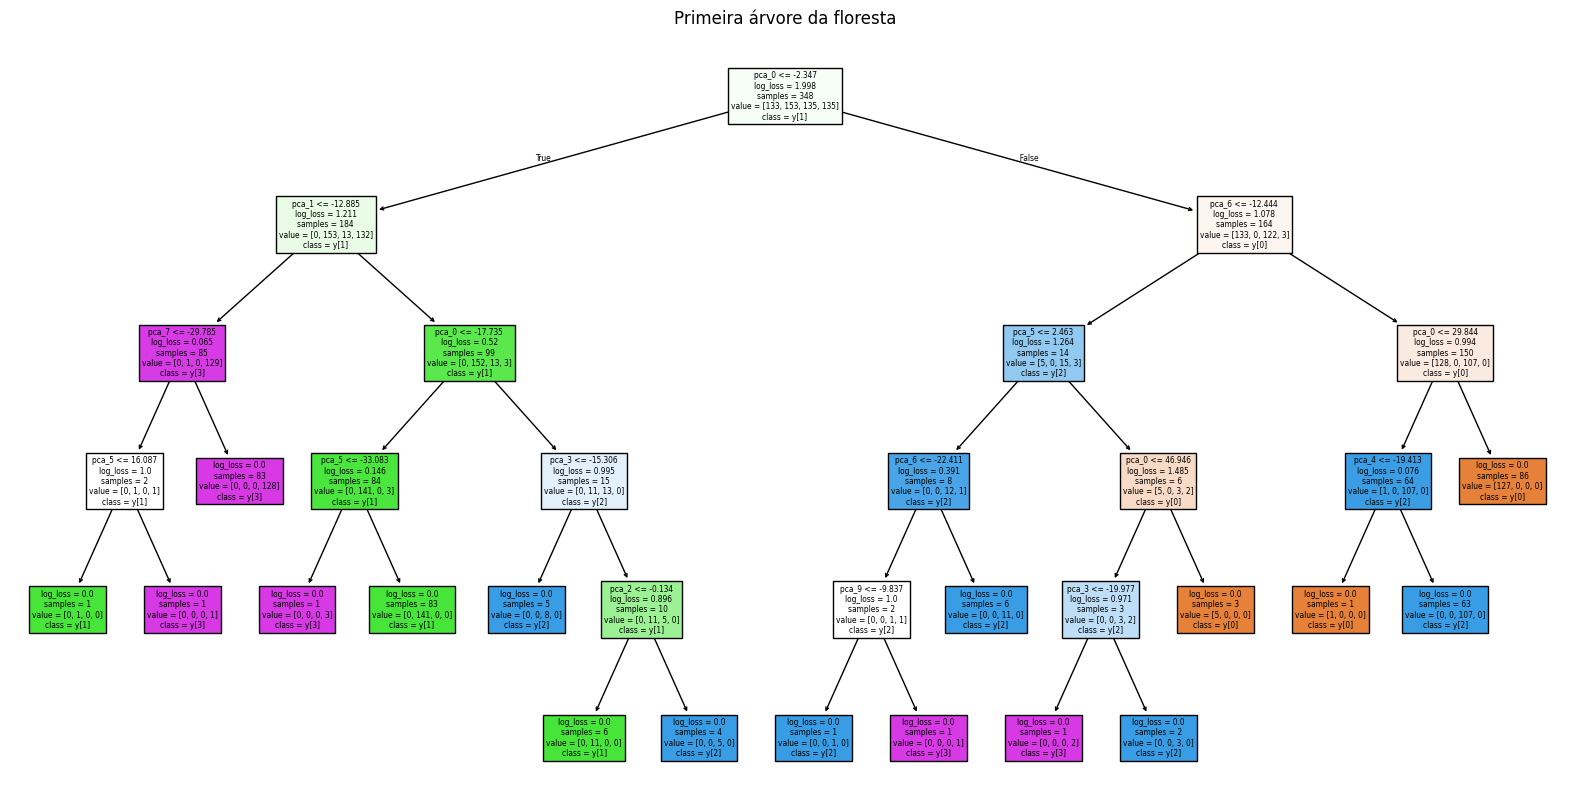

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.97490
[[64  0  0  0]
 [ 0 55  1  1]
 [ 0  1 64  0]
 [ 0  3  0 50]]


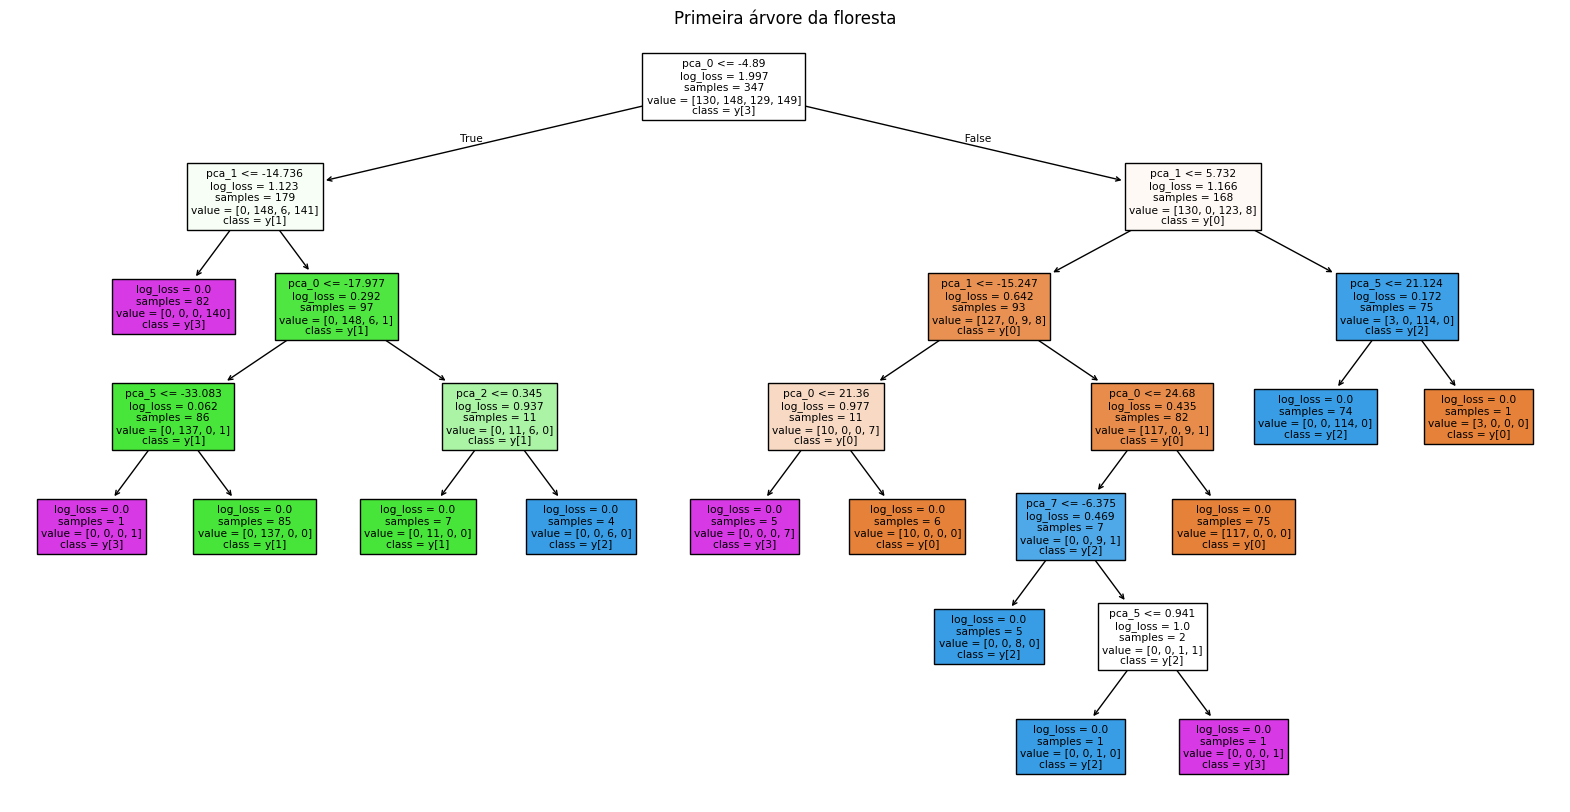

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.97908
[[64  0  0  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  2  1 50]]


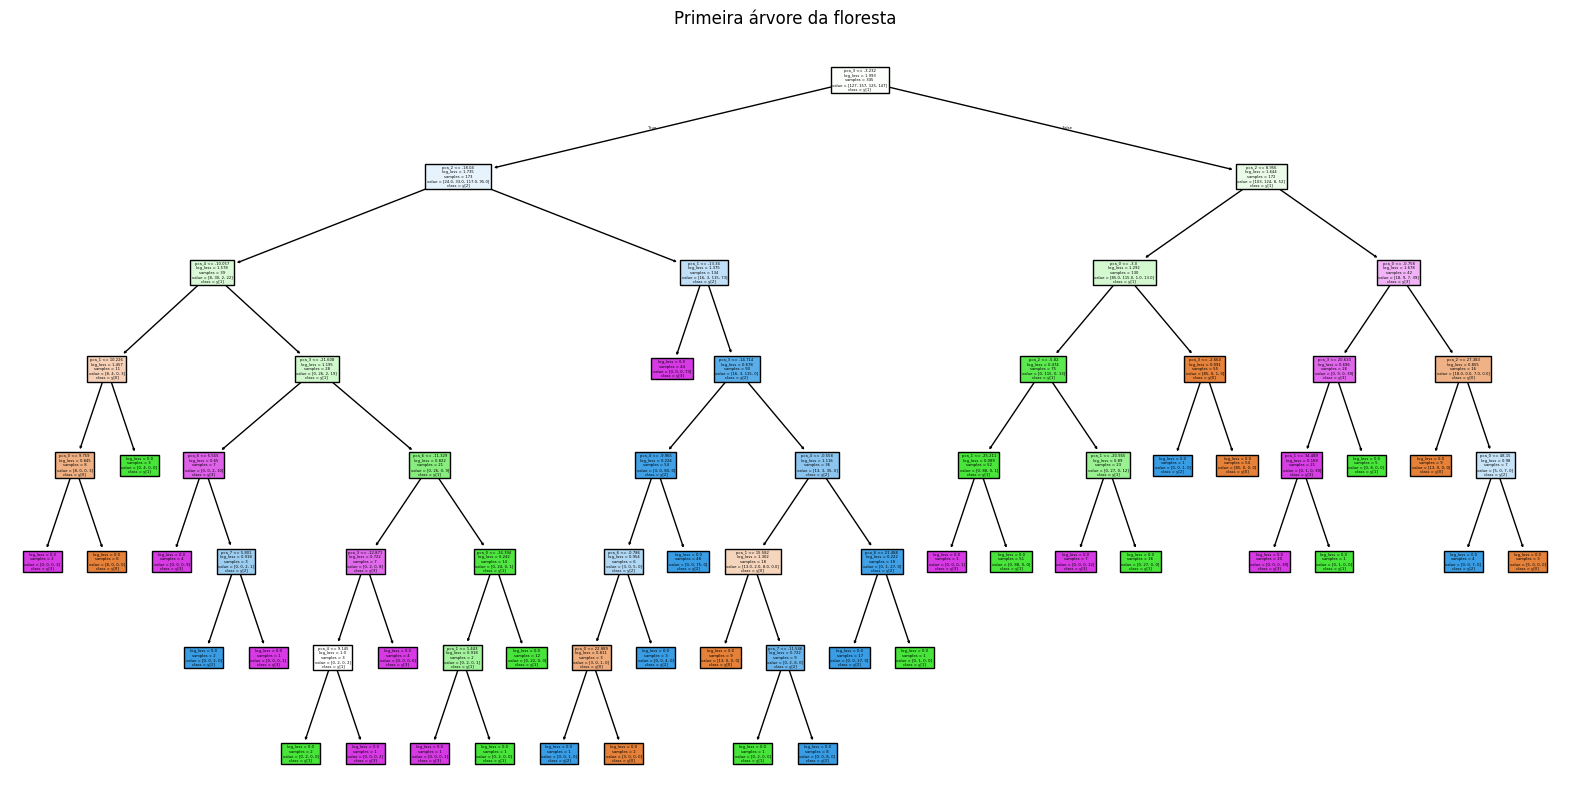

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.97908
[[64  0  0  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 1  2  0 50]]


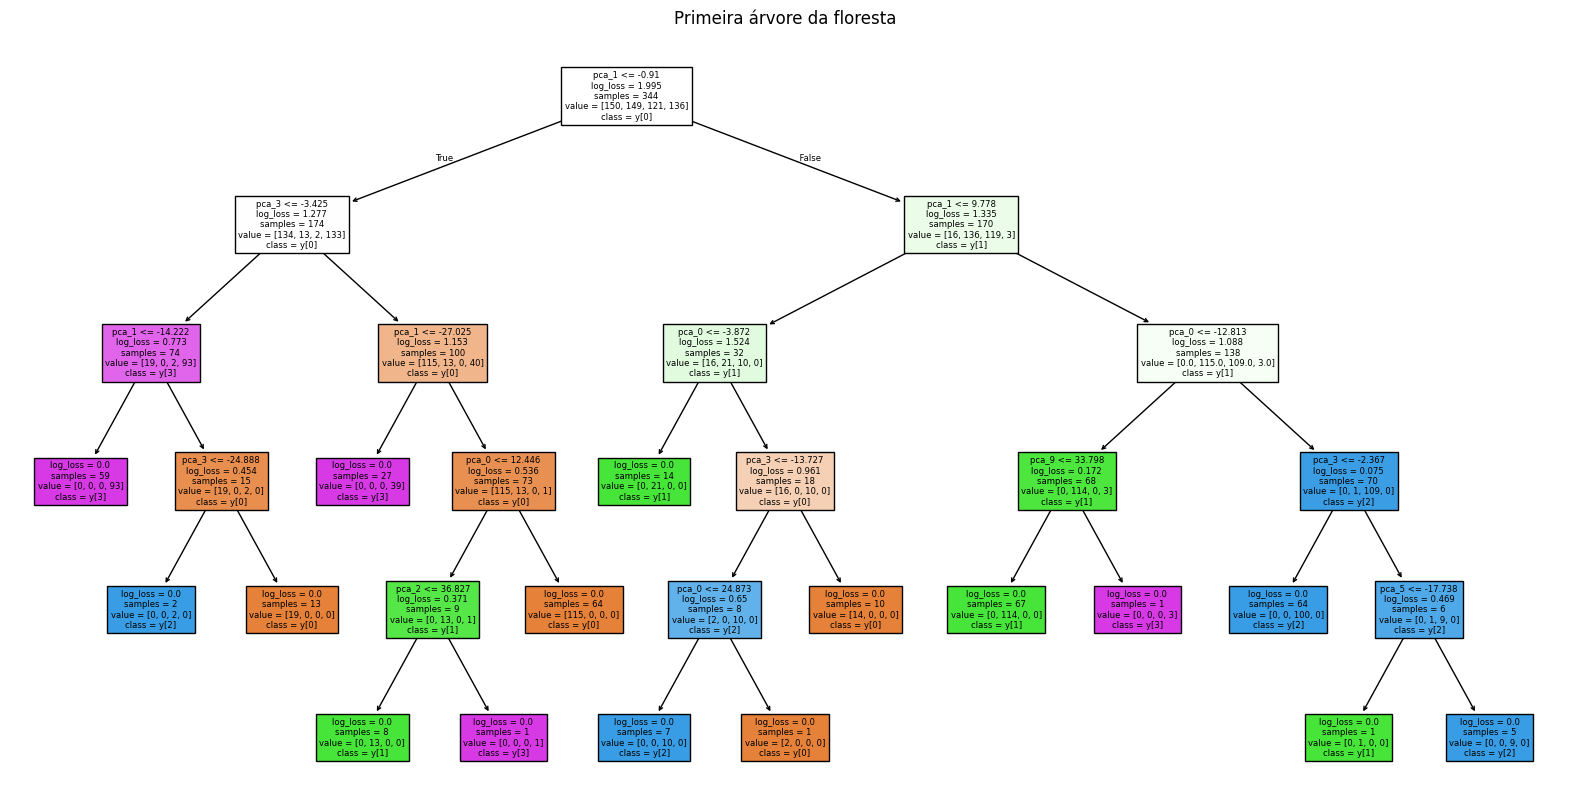

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.97908
[[64  0  0  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  3  0 50]]

--------------------- PCA_cnn_VGG19_128_max ---------------------


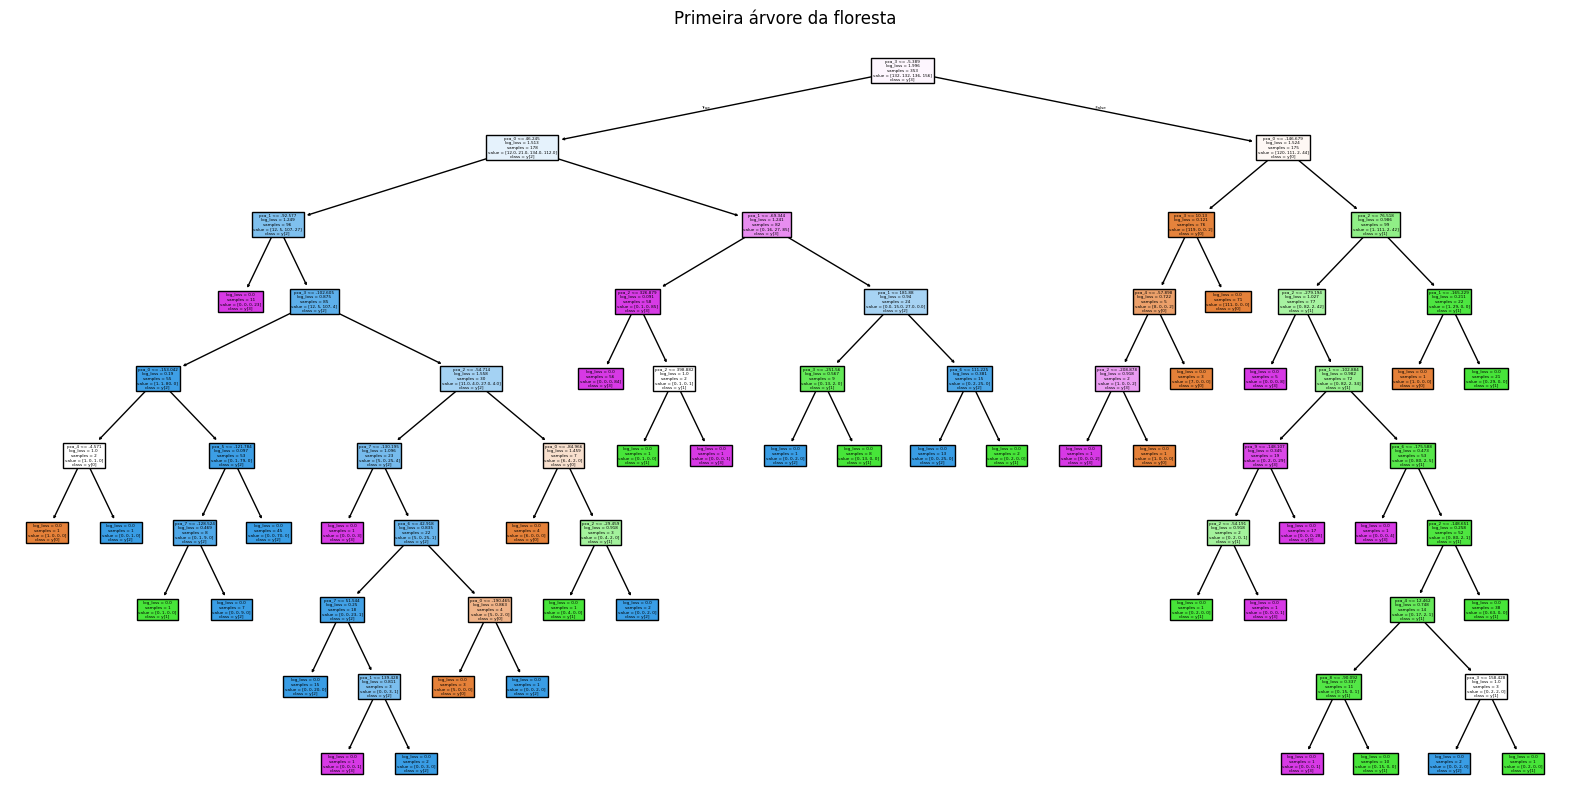

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.94561
[[63  0  1  0]
 [ 0 52  4  1]
 [ 0  1 64  0]
 [ 0  3  3 47]]


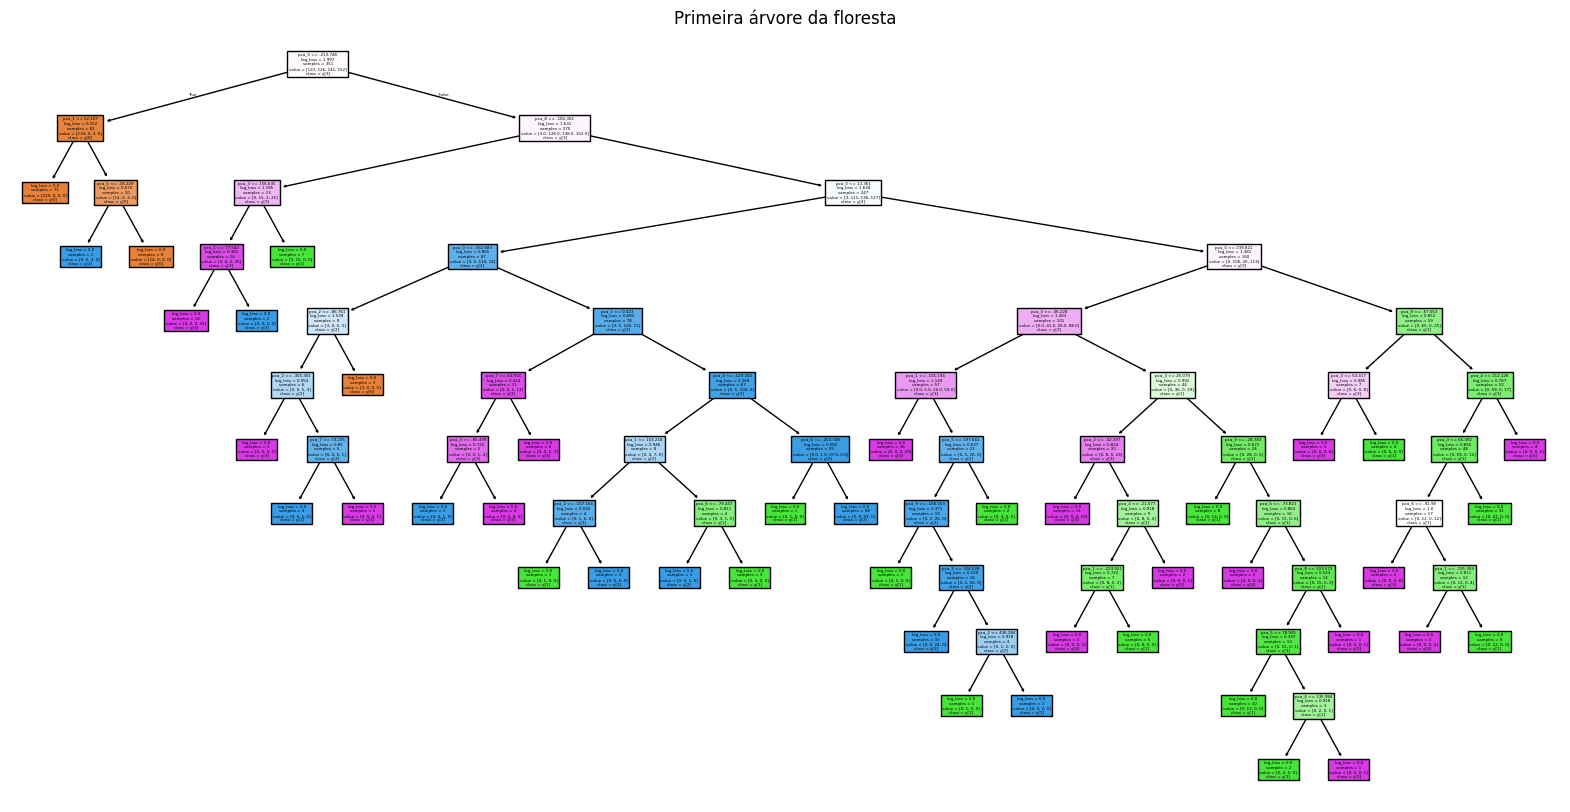

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.95816
[[63  0  1  0]
 [ 0 53  2  2]
 [ 0  1 64  0]
 [ 0  3  1 49]]


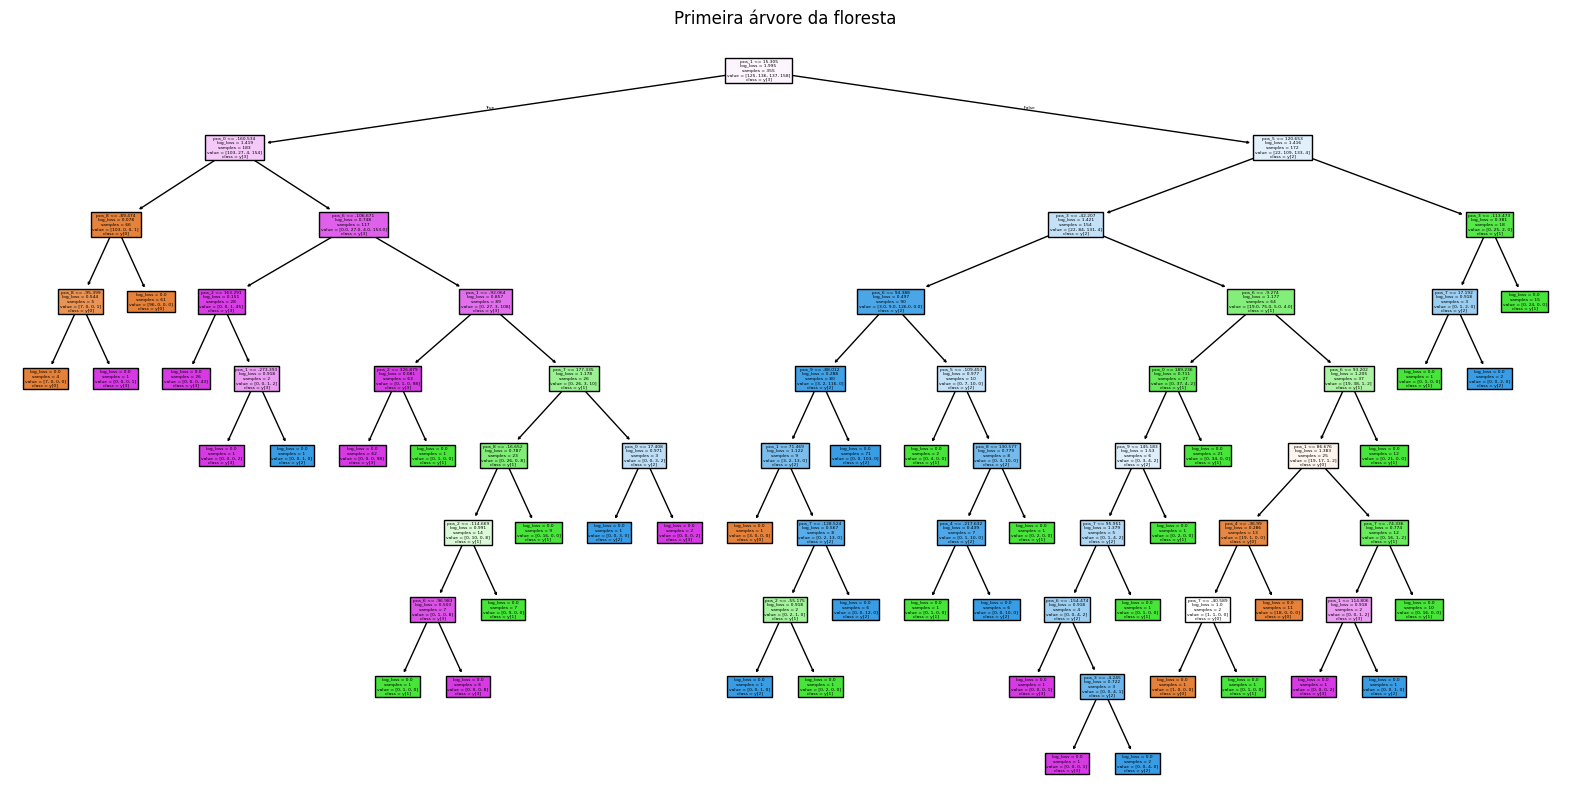

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.93724
[[62  0  2  0]
 [ 0 51  4  2]
 [ 0  3 62  0]
 [ 0  3  1 49]]


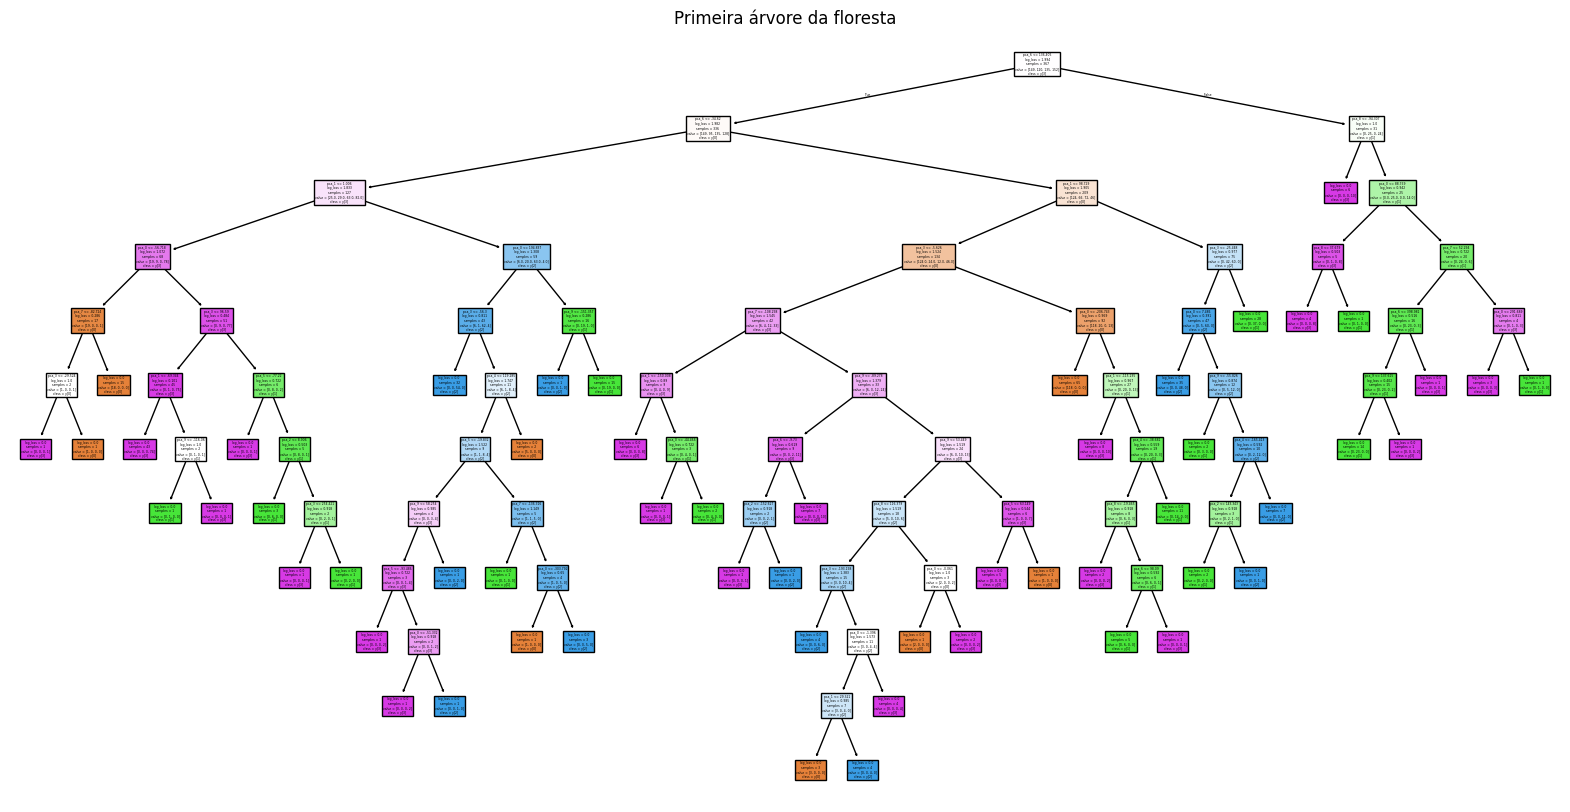

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.94142
[[63  0  1  0]
 [ 0 51  4  2]
 [ 0  2 63  0]
 [ 0  4  1 48]]

--------------------- PCA_cnn_VGG19_256_max ---------------------


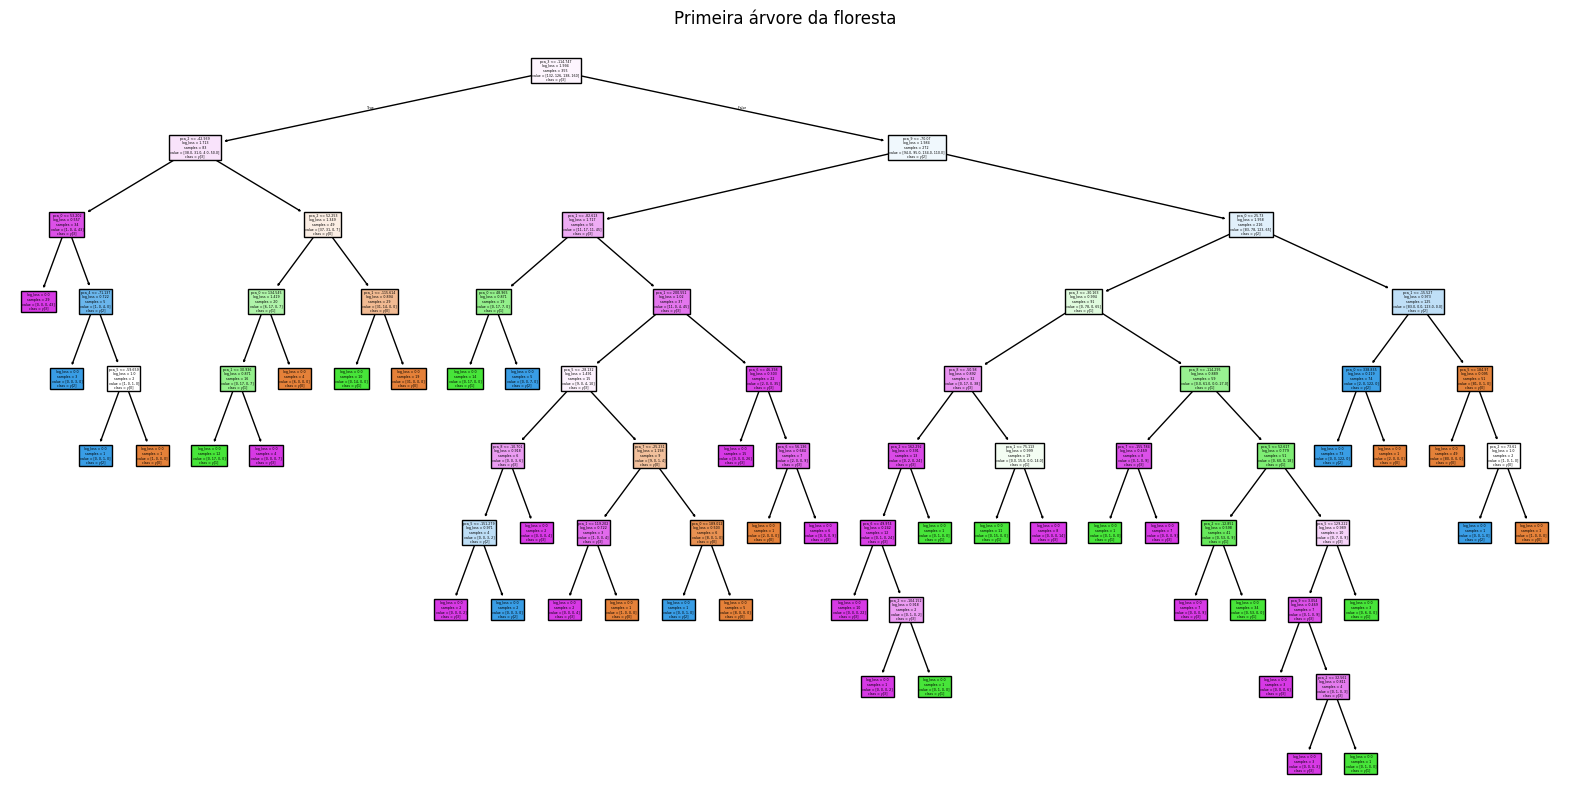

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.97908
[[63  0  1  0]
 [ 0 55  0  2]
 [ 0  0 65  0]
 [ 0  2  0 51]]


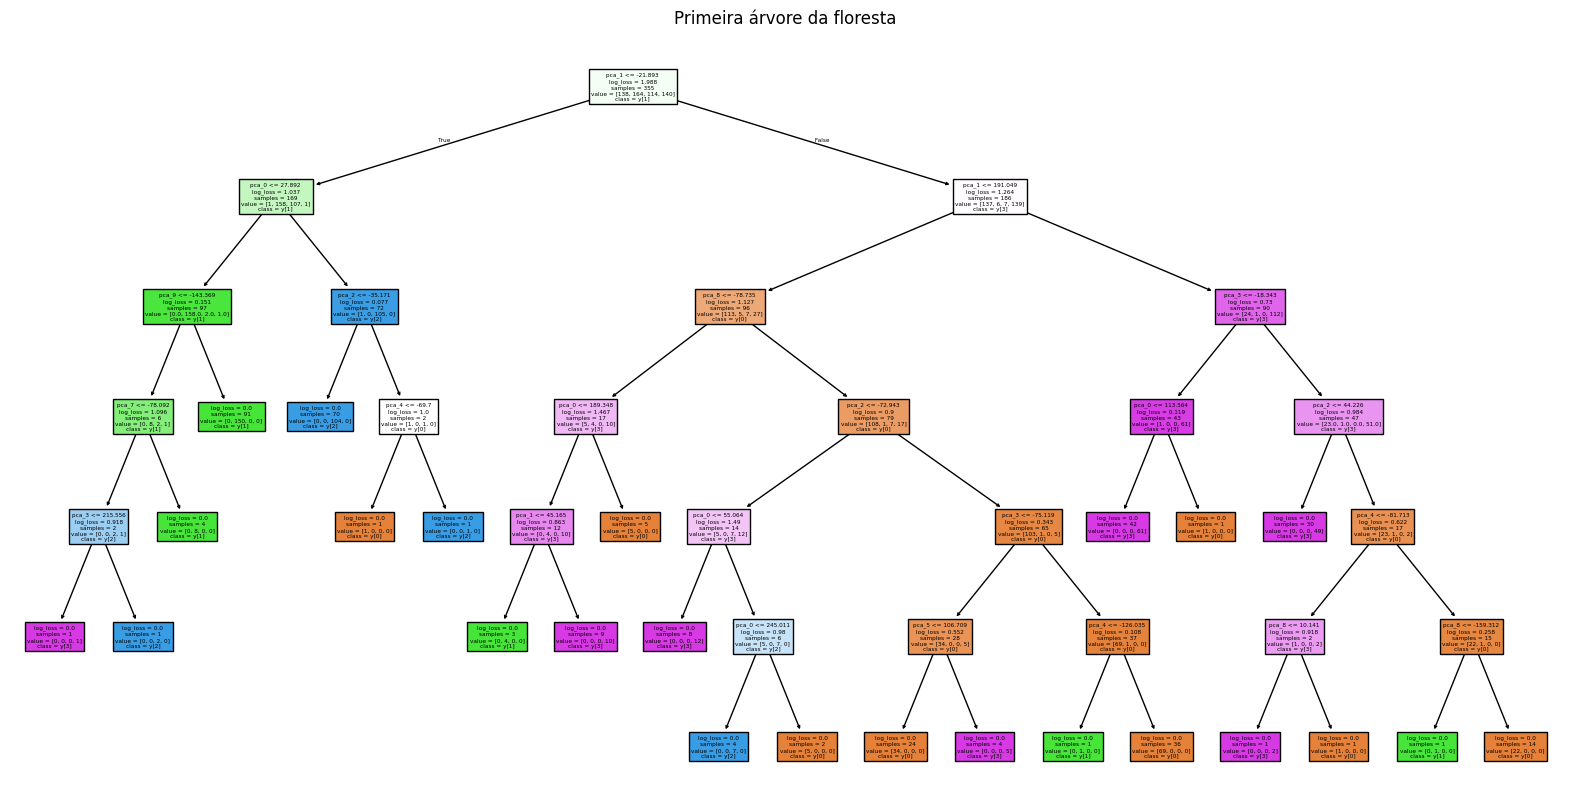

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.98326
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  1  0 52]]


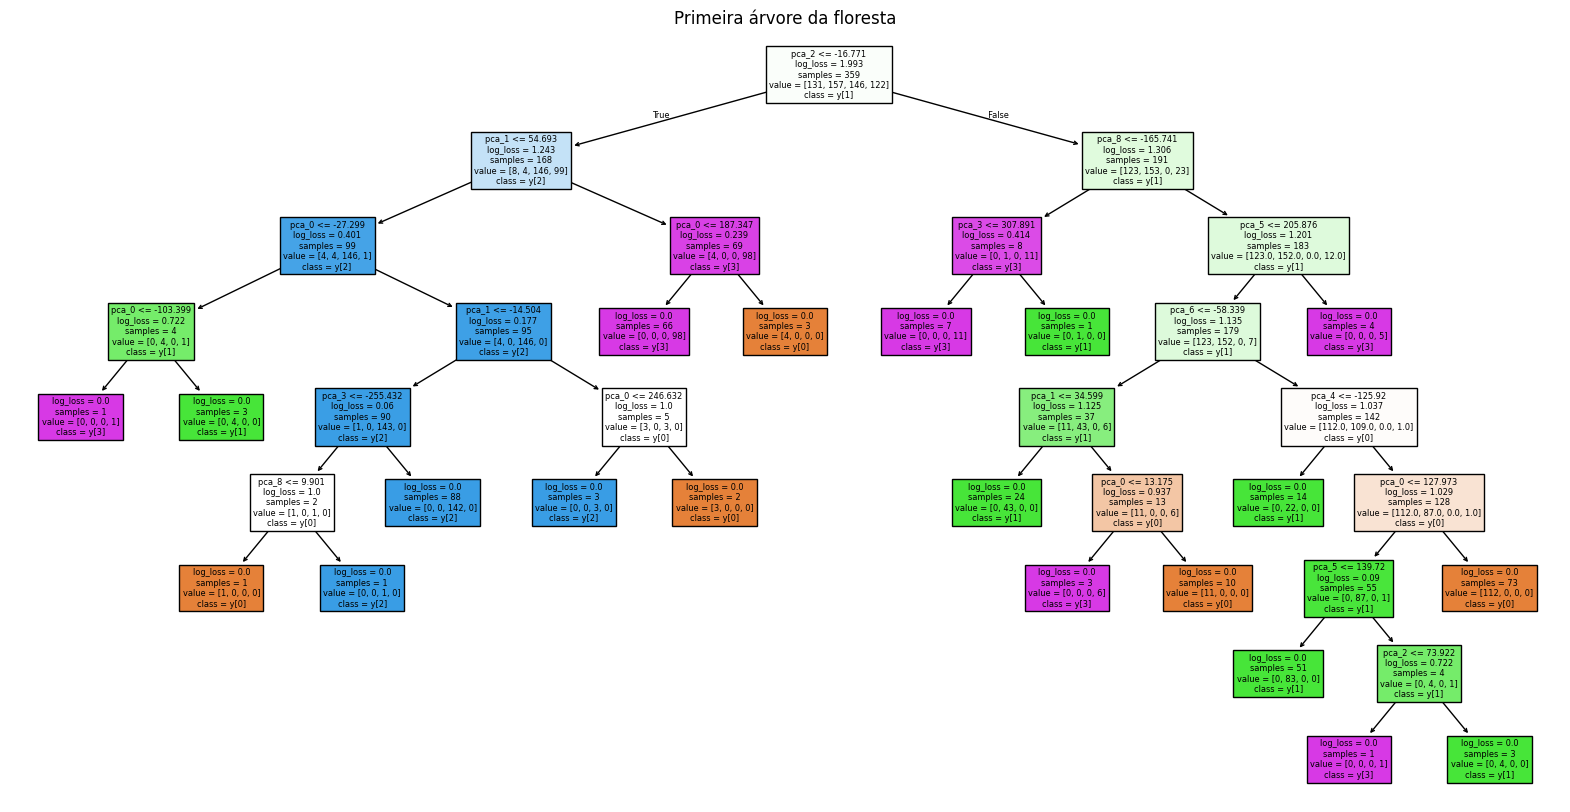

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.98745
[[64  0  0  0]
 [ 0 56  0  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


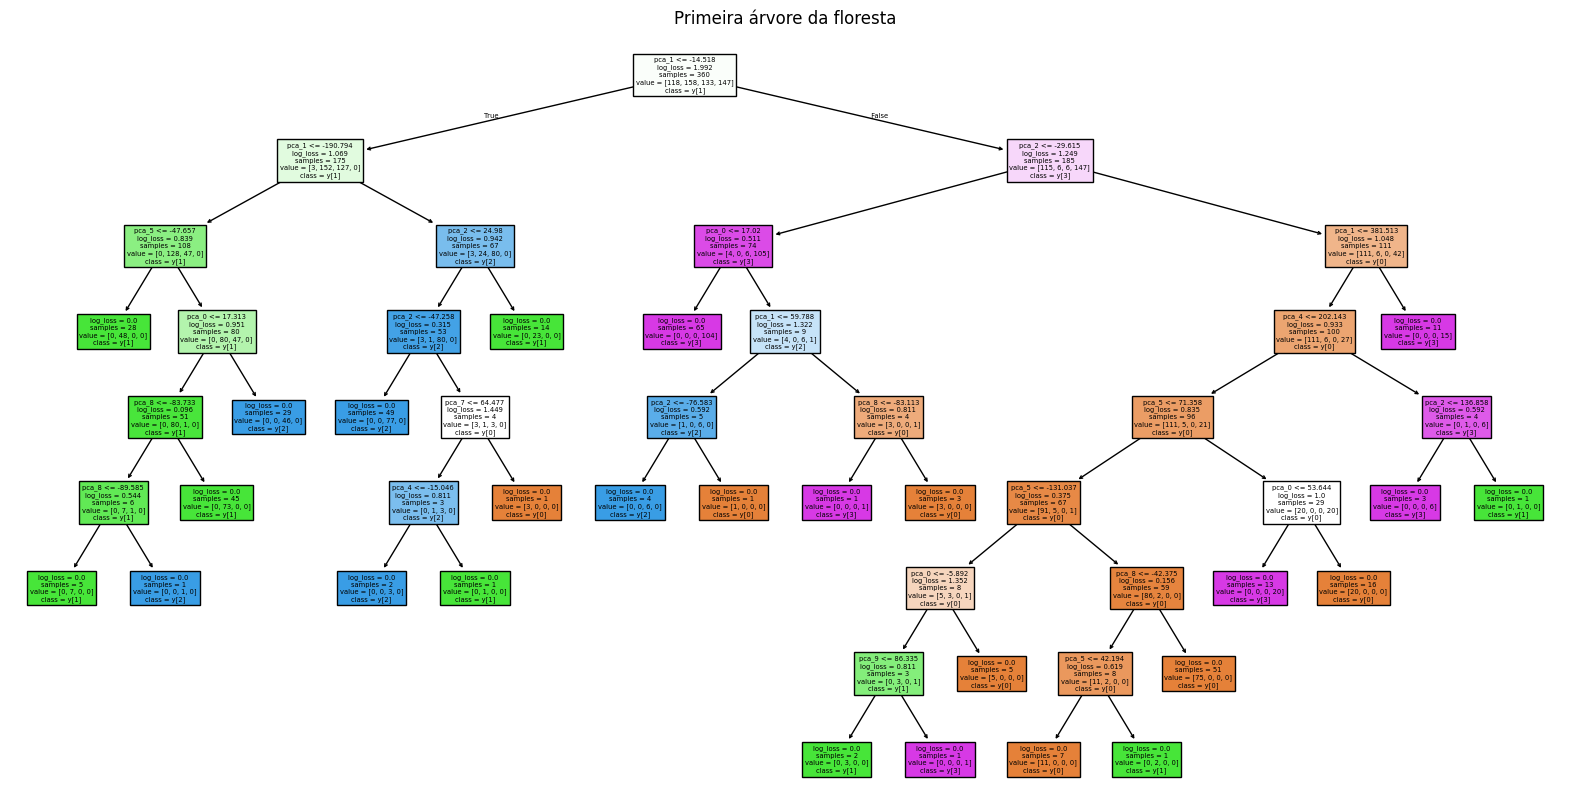

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.97071
[[62  0  1  1]
 [ 0 54  1  2]
 [ 0  0 65  0]
 [ 0  2  0 51]]

--------------------- PCA_cnn_VGG19_128_avg ---------------------


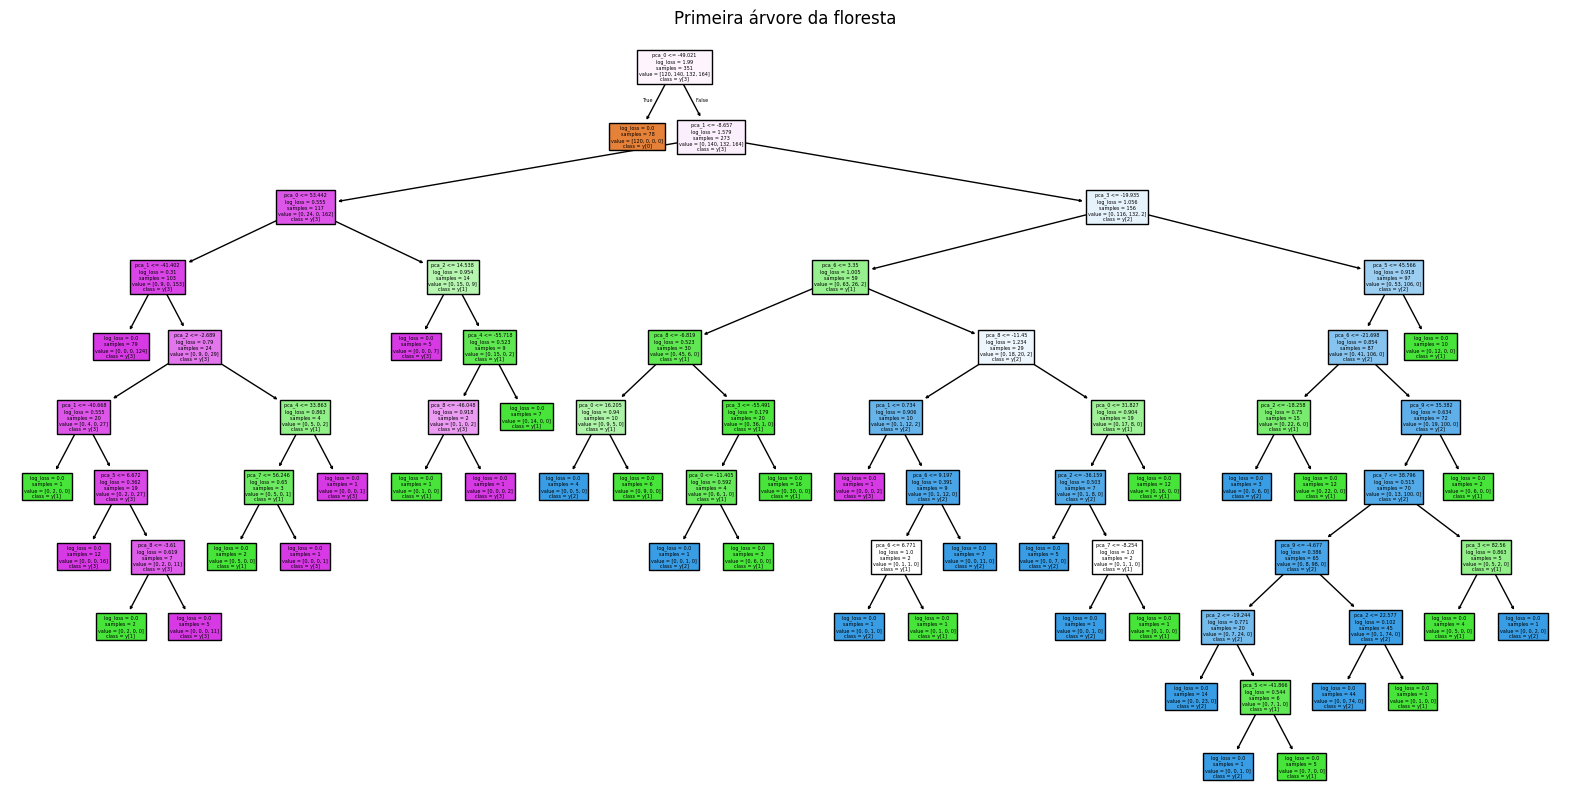

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.94142
[[63  0  1  0]
 [ 0 51  4  2]
 [ 0  3 62  0]
 [ 0  4  0 49]]


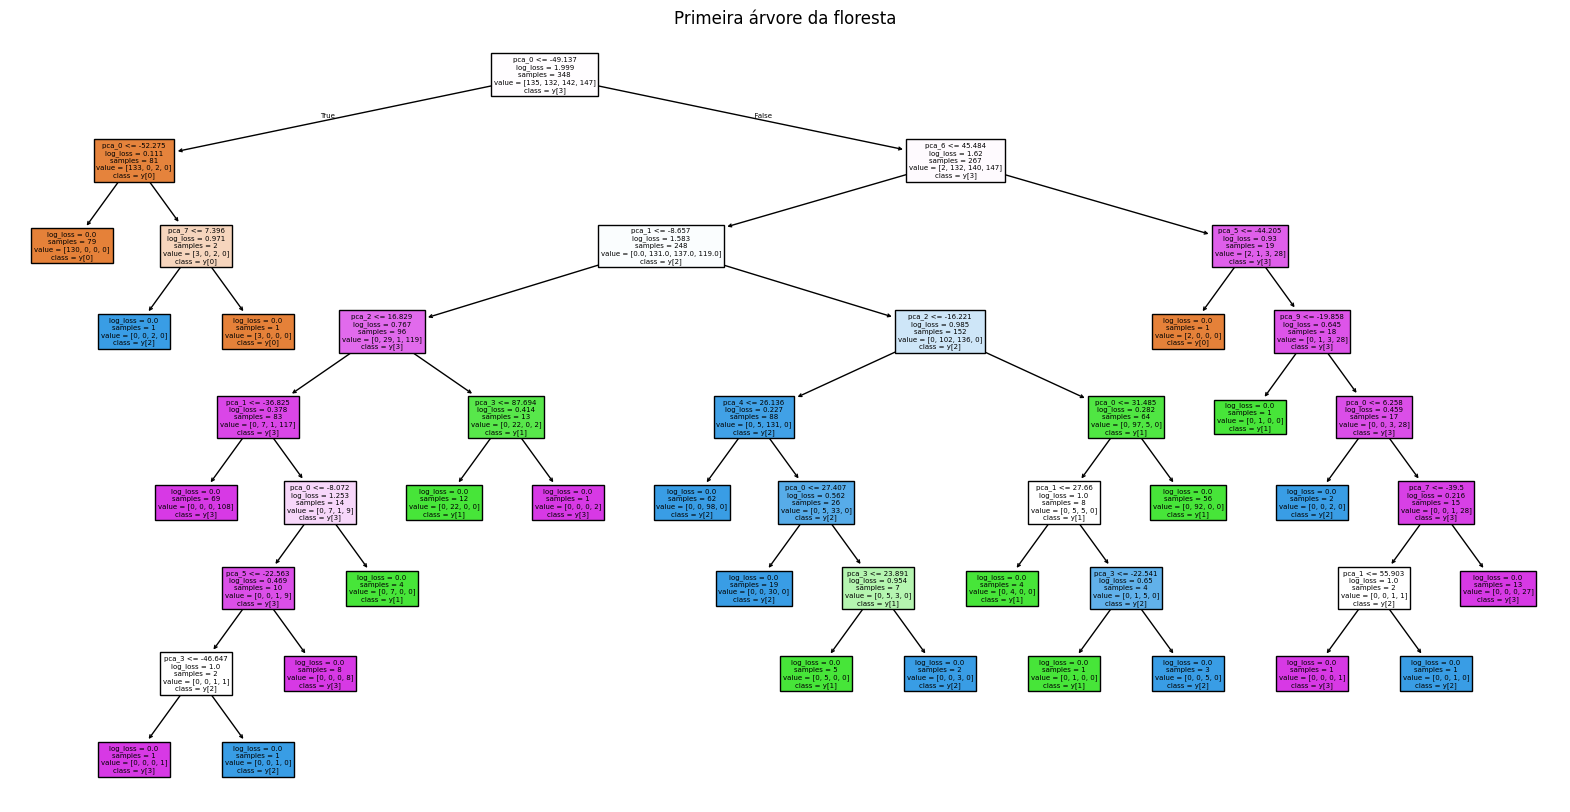

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.94561
[[63  0  1  0]
 [ 0 52  3  2]
 [ 0  1 64  0]
 [ 0  5  1 47]]


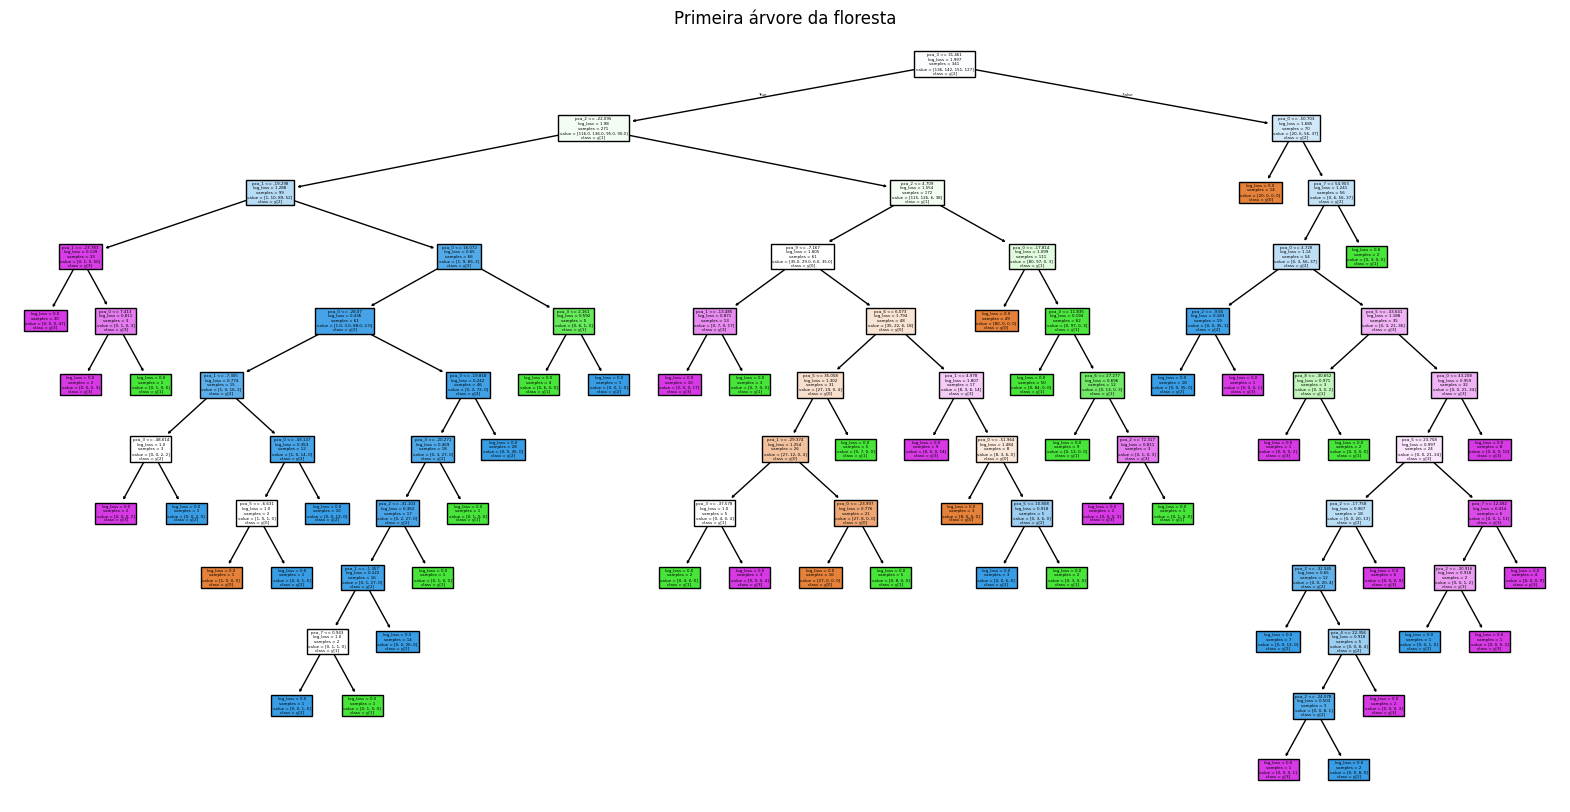

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.94142
[[63  0  1  0]
 [ 0 52  3  2]
 [ 0  2 62  1]
 [ 0  5  0 48]]


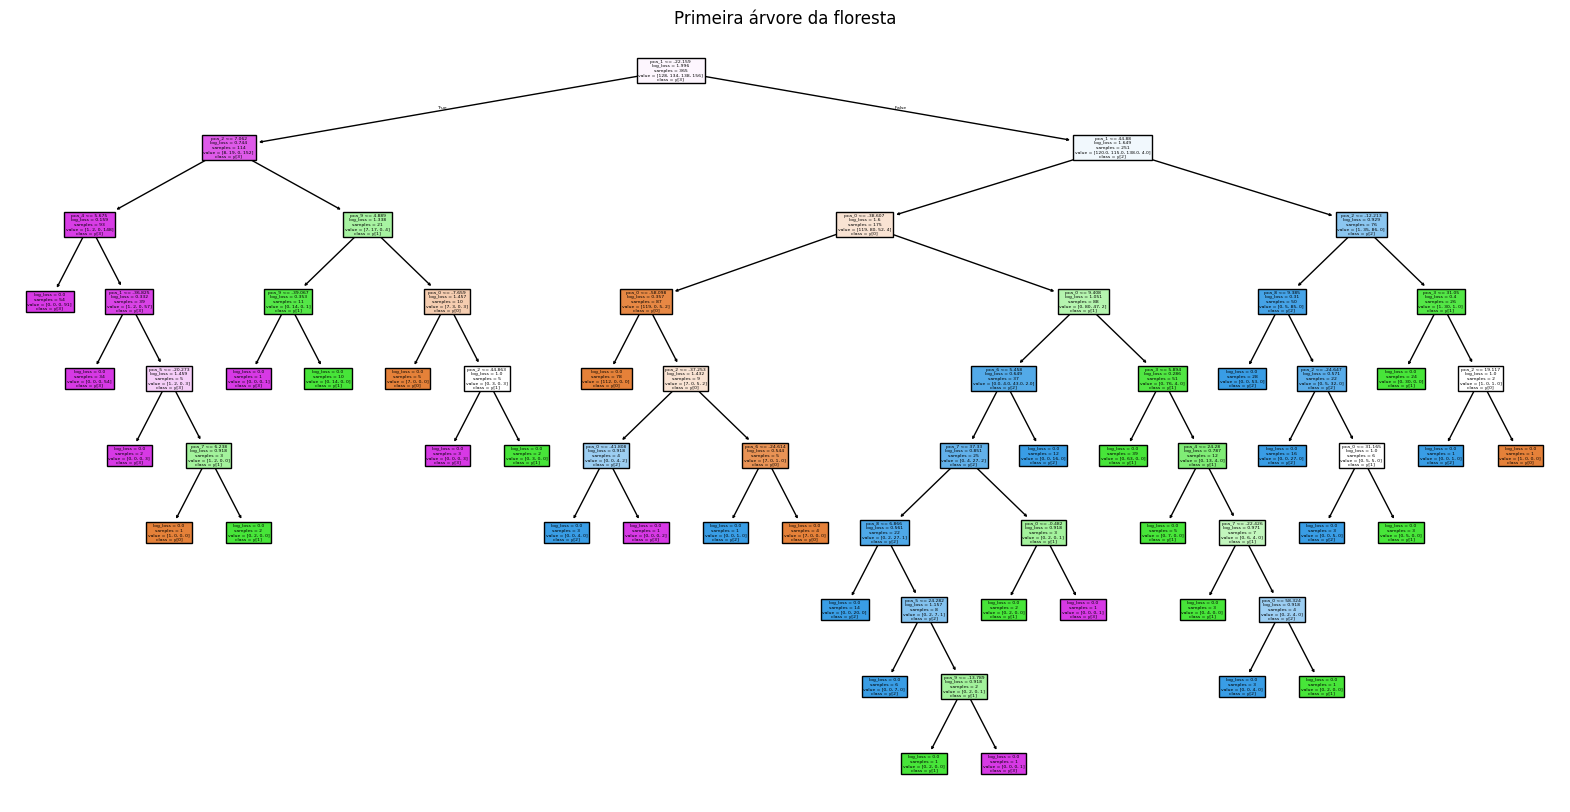

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.94561
[[63  0  1  0]
 [ 0 53  2  2]
 [ 0  2 62  1]
 [ 0  5  0 48]]

--------------------- PCA_cnn_VGG19_256_avg ---------------------


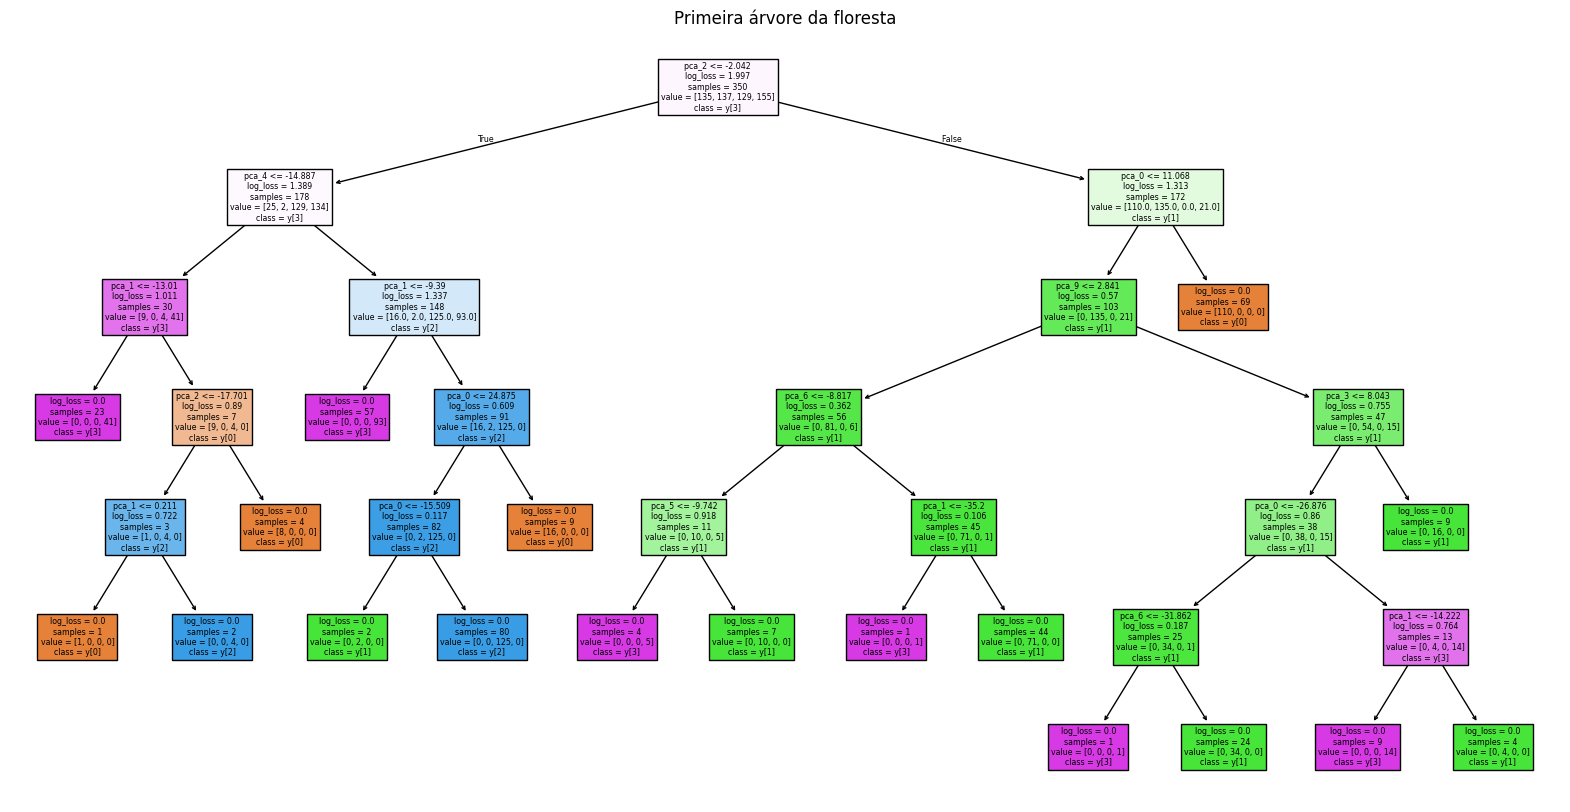

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=10)  | Accuracy: 0.97490
[[62  0  2  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


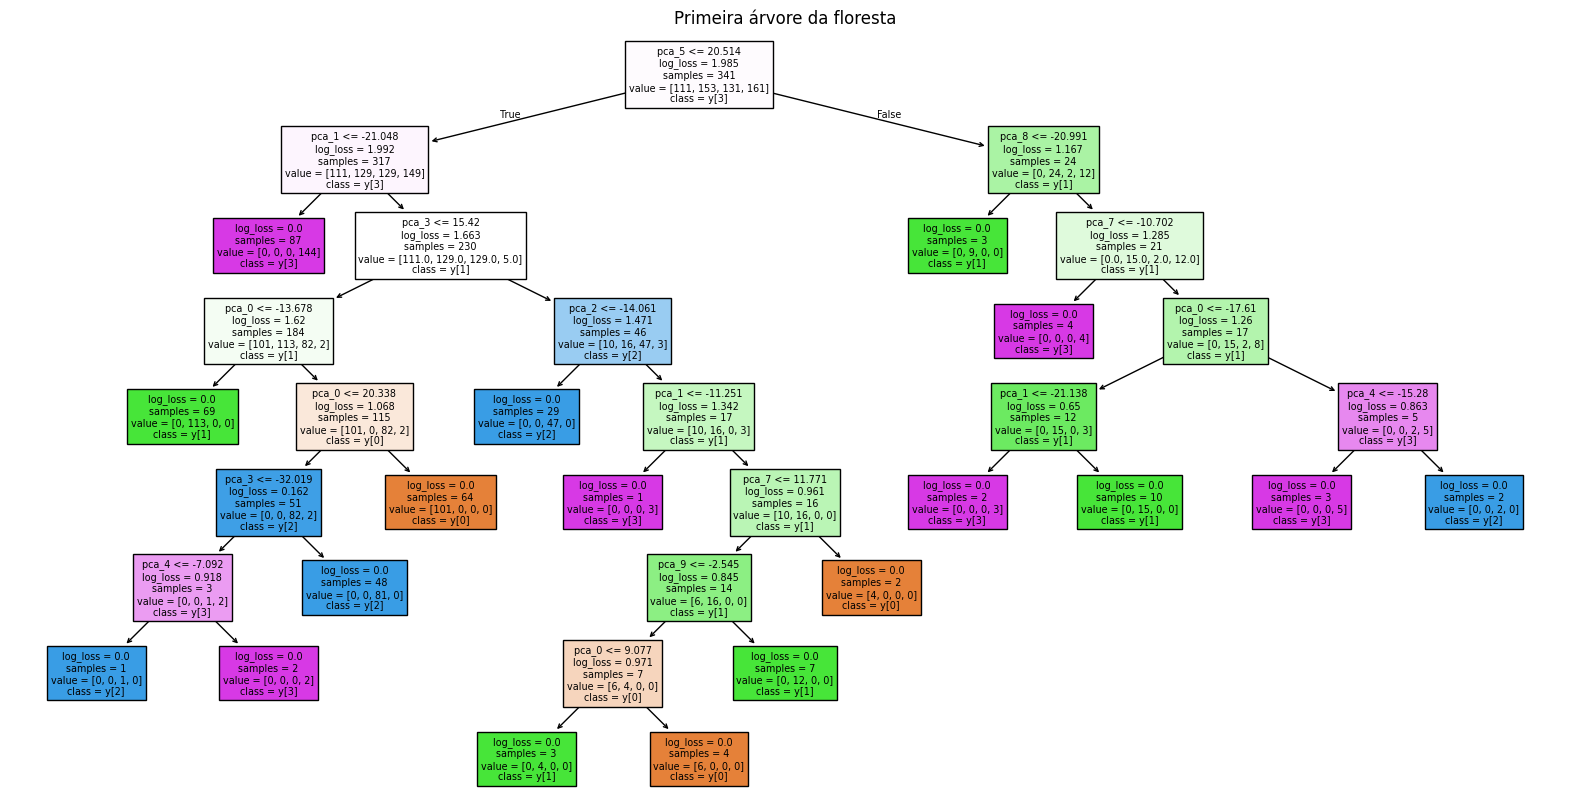

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=20)  | Accuracy: 0.97908
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


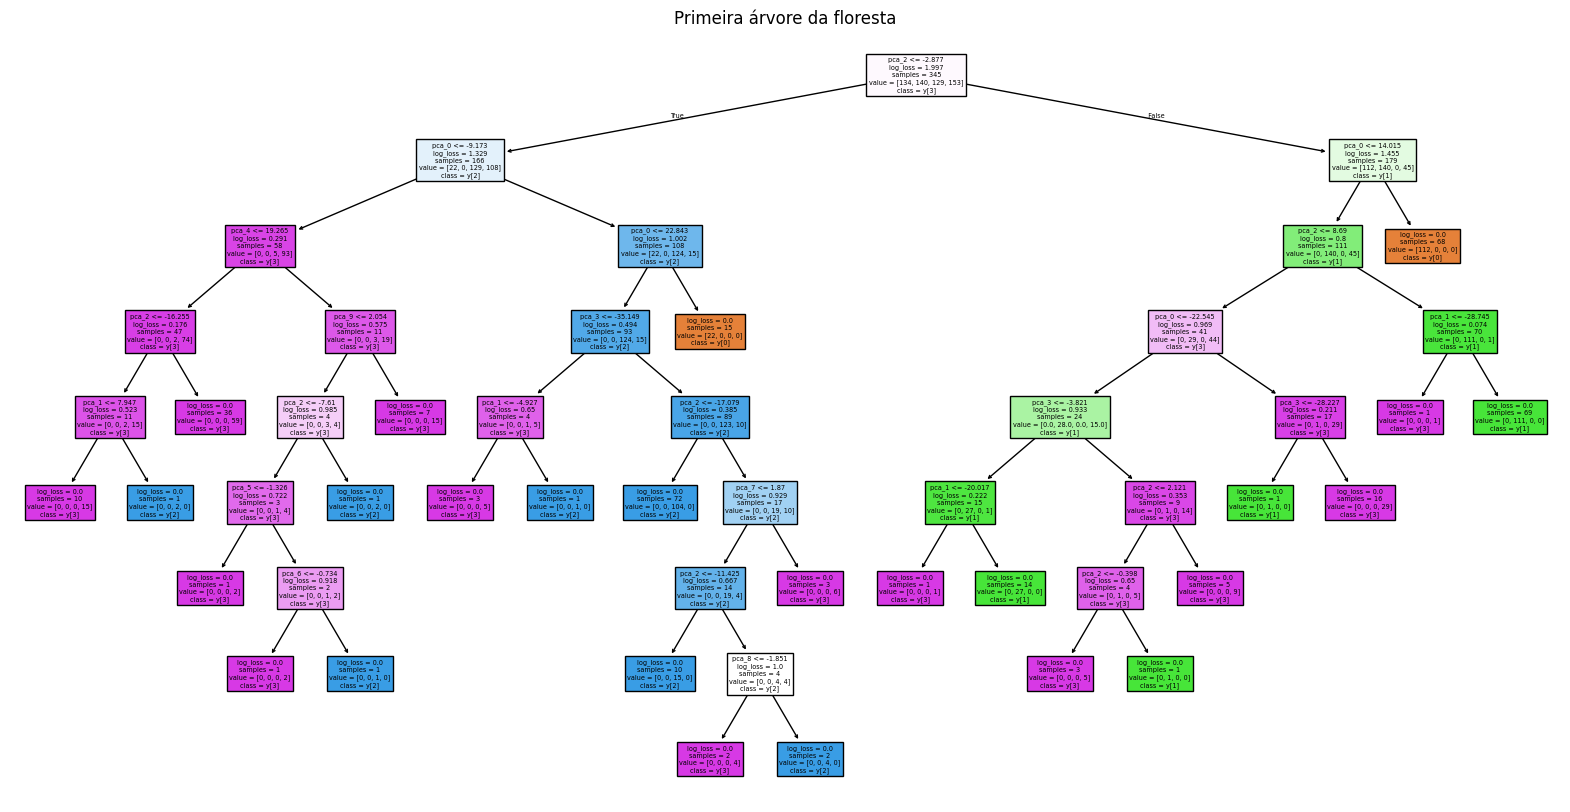

Metrica: RandomForestClassifier(criterion='log_loss', n_estimators=30)  | Accuracy: 0.97908
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


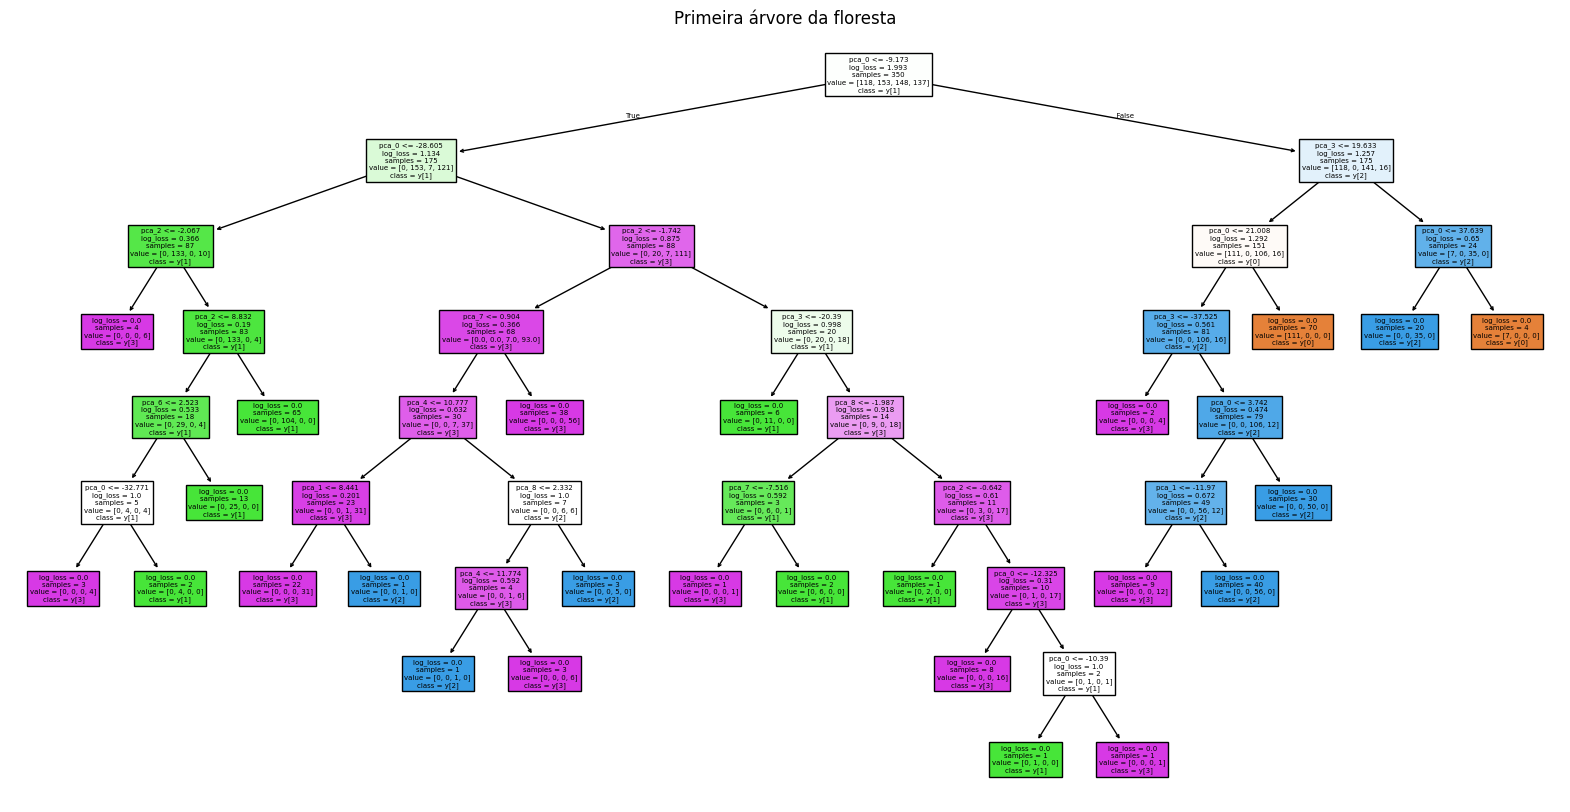

Metrica: RandomForestClassifier(criterion='log_loss')  | Accuracy: 0.97908
[[63  0  1  0]
 [ 0 55  1  1]
 [ 0  0 65  0]
 [ 0  2  0 51]]


In [28]:
for name, X_train, X_test, y_train, y_test in datasets:
    print(f"\n--------------------- {name} ---------------------")
    for rf in rfs:
        aplicar_RF_holdout(X_train, X_test, y_train, y_test, rf)
